# Identificando Tendências de SRAG por Agrupamento

<img src = "saúde.jpg">

## Introdução

A Síndrome Respiratória Aguda Grave (SRAG) é uma condição clínica caracterizada por dificuldades respiratórias graves, que pode resultar em insuficiência respiratória. Ela é geralmente causada por infecções respiratórias virais, como a influenza, o vírus sincicial respiratório (VSR) e o coronavírus (como o SARS-CoV-2). Os principais sintomas incluem falta de ar, febre alta, tosse e, em casos severos, a necessidade de suporte ventilatório. A SRAG é uma preocupação de saúde pública, especialmente em populações vulneráveis, como idosos, crianças e pessoas com comorbidades. O tratamento costuma envolver cuidados intensivos e medidas de suporte à respiração.

Em 2019, o Ministério da Saúde do Brasil adotou uma importante medida para aprimorar o monitoramento e a gestão da saúde pública. A decisão envolveu a coleta sistemática de dados dos formulários de atendimento médico de pacientes em todo o território nacional. Com o resultado da coleta de dados, foi desenvolvido um dicionário de dados contendo 78 variáveis. Esse dicionário integra informações essenciais para o acompanhamento de pacientes em todo o Brasil, incluindo dados demográficos, como idade, sexo e local de residência, dados de sintomas apresentados pelos pacientes durante o atendimento, e também dados pessoais. Mais informações podem ser vistas no site do Governo de Minas Gerais.

[Clique no link para saber mais!!!](https://coronavirus.saude.mg.gov.br/blog/75-o-que-e-sindrome-respiratoria-aguda-grave)

## Sobre o Estudo

Este trabalho tem como objetivo realizar a mineração de dados sobre a Síndrome Respiratória Aguda Grave (SRAG) no Brasil. Para isso, serão analisados os dados referentes ao primeiro semestre de 2020, período marcado pelo impacto inicial da pandemia de COVID-19, que gerou um aumento significativo de casos de SRAG. O foco da análise será a aplicação do algoritmo de Agrupamento (k-means) para agrupar os pacientes com base nos sintomas relatados. O objetivo é identificar, a partir dos dados coletados, quais casos podem ser considerados severos ou não. Essa abordagem permitirá uma melhor compreensão da gravidade dos quadros clínicos e poderá auxiliar em futuras tomadas de decisão no setor de saúde.

Logo, algumas questões norteadoras podem ser respondidas:

1. Quais variáveis influenciam diretamente a severidade dos casos de SRAG?

2. Como o algoritmo de agrupamento (k-means) diferencia pacientes com casos severos de SRAG daqueles com casos menos graves?

3. Qual a eficácia do algoritmo k-means na classificação de casos severos de SRAG com base nos sintomas relatados?

4. Há uma correlação entre a presença de certos sintomas e a gravidade da SRAG?

Essas questões orientam a análise de dados e contribuem para o entendimento de como os sintomas se relacionam com a gravidade dos casos de SRAG.

<div class="alert alert-block alert-info"
     <b> O k-means é um algoritmo de aprendizado não supervisionado utilizado para agrupamento de dados. Ele funciona ao dividir um conjunto de dados em um número pré-definido de grupos ou clusters, baseando-se nas similaridades entre os dados. O algoritmo atribui cada dado a um grupo, de forma que os pontos dentro de um cluster tenham características mais parecidas entre si e diferentes dos pontos em outros clusters. No processo, o k-means calcula centros de grupo (chamados de centróides) e ajusta iterativamente as alocações dos dados até encontrar a melhor separação. Ele é amplamente utilizado em diversas áreas, como análise de mercado, reconhecimento de padrões e, no caso de dados médicos, na classificação de pacientes com base em sintomas ou outros critérios clínicos. </b>
</div>

## Importação de Bibliotecas

Algumas bibliotecas fazem parte do Processo de Mineração de Dados, sendo também o primeiro passo para qualquer projeto. Logo:

In [1]:
#Importando bibliotecas essenciais para o trabalho

#para forçar a leitura de arquivos csv
import csv 

#Algoritmo K-means
from sklearn.cluster import KMeans

#Normalização
from sklearn.preprocessing import StandardScaler 

# importa a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np

# importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd

# permite criar tabelas a partir de dados em forma de listas, dicionários, matrizes ou outros formatos de dados tabulares
from tabulate import tabulate

# fornece estilos e funções adicionais para aprimorar a estética das visualizações
import seaborn as sns

# série de funções para criar e personalizar gráficos de maneira simples e direta
import matplotlib.pyplot as plt
%matplotlib inline 

# controlar a formatação dos ticks (marcas) nos eixos dos gráficos
import matplotlib.ticker as ticker

# criar uma mapa de cores a partir de uma lista de cores específicas
from matplotlib.colors import ListedColormap

# métricas de avaliação de desempenho do modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_absolute_error, confusion_matrix

# funções e classes específicas para avaliação de métricas e desempenho
from sklearn import metrics

# padronizar os recursos (features) de um conjunto de dados
from sklearn.preprocessing import StandardScaler

# gráfico dinâmico
import plotly.express as px
import plotly.graph_objects as go

print('Bibliotecas carregadas com sucesso!!!')

Bibliotecas carregadas com sucesso!!!


## Limpeza e Preparação de Dados

A limpeza de dados é o processo de purificar um conjunto de registros, tabela ou banco de dados, a fim de detectar e corrigir registros corrompidos ou imprecisos. Esse processo envolve a identificação de partes dos dados que estejam incompletas, incorretas, imprecisas ou irrelevantes, para que possam ser substituídas, modificadas ou excluídas.

### Leitura da Base de Dados

Neste trabalho, a base de dados original foi fragmentada com exclusivamente os dados dos pacientes, como idade, sexo, estado e a zona de sua cidade( Urbana, Rural ou Periurbana). Depois, foco nos principais sintomas apresentados pelos pacientes, que são determinantes para identificar se um caso é de Síndrome Respiratória Aguda Grave (SRAG) ou não, com base no site do Ministério da Saúde do Estado de Minas Gerais são: febre, tosse, garganta, dispneia, desconforto respiratório, saturação e risco. Essa separação foi realizada para permitir uma análise mais direcionada, facilitando o uso do algoritmo de agrupamento (k-means) na identificação de padrões e na classificação da severidade dos casos de SRAG com base nos sintomas relatados.

In [2]:
#Leitura da base de dados
df = pd.read_csv("Base de Dados.csv", sep=';', encoding='UTF-8')

print('Database lida com sucesso!')

Database lida com sucesso!


<div class="alert alert-block alert-warning"
     <b> UTF - 8 é o formato padrão para o Brasil em relação ao manuseio de dados. </b>
</div>

In [3]:
#Informações sobre a database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403071 entries, 0 to 403070
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   SG_UF_NOT   403071 non-null  object 
 1   CS_SEXO     403071 non-null  object 
 2   NU_IDADE_N  403071 non-null  int64  
 3   CS_ZONA     358273 non-null  float64
 4   FEBRE       362867 non-null  float64
 5   TOSSE       365781 non-null  float64
 6   GARGANTA    311568 non-null  float64
 7   DISPNEIA    360225 non-null  float64
 8   DESC_RESP   339898 non-null  float64
 9   SATURACAO   338855 non-null  float64
 10  FATOR_RISC  403071 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 33.8+ MB


In [4]:
#Tamanho da base de dados: número de linhas e número de colunas
df.shape

(403071, 11)

In [5]:
#Estatísticas Gerais da CSV
df.describe()

NU_IDADE_N        CS_ZONA          FEBRE          TOSSE  \
count  403071.000000  358273.000000  362867.000000  365781.000000   
mean       55.576310       1.058525       1.392783       1.315246   
std        22.406511       0.322242       1.118570       1.045961   
min         0.000000       1.000000       1.000000       1.000000   
25%        41.000000       1.000000       1.000000       1.000000   
50%        58.000000       1.000000       1.000000       1.000000   
75%        73.000000       1.000000       2.000000       1.000000   
max       138.000000       9.000000       9.000000       9.000000   

            GARGANTA       DISPNEIA      DESC_RESP      SATURACAO  
count  311568.000000  360225.000000  339898.000000  338855.000000  
mean        2.046205       1.341731       1.480385       1.578894  
std         1.542460       1.043026       1.226740       1.362805  
min         1.000000       1.000000       1.000000       1.000000  
25%         1.000000       1.000000       1.000000       1.000000  
50%         2.000000       1.000000       1.000000       1.000000  
75%         2.000000       1.000000       2.000000       2.000000  
max         9.000000       9.000000       9.000000       9.000000

In [6]:
 #Saber o nome das colunas
df.columns

Index(['SG_UF_NOT', 'CS_SEXO', 'NU_IDADE_N', 'CS_ZONA', 'FEBRE', 'TOSSE',
       'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'FATOR_RISC'],
      dtype='object')

In [7]:
# Visualização do Dataframe
df.head()

SG_UF_NOT CS_SEXO  NU_IDADE_N  CS_ZONA  FEBRE  TOSSE  GARGANTA  DISPNEIA  \
0        DF       M           1      1.0    1.0    1.0       2.0       9.0   
1        CE       M           9      1.0    1.0    1.0       2.0       1.0   
2        SP       F          57      1.0    1.0    1.0       2.0       1.0   
3        SP       M           1      1.0    1.0    1.0       1.0       2.0   
4        PR       F          29      1.0    1.0    1.0       1.0       1.0   

   DESC_RESP  SATURACAO FATOR_RISC  
0        1.0        1.0          N  
1        1.0        1.0          N  
2        1.0        1.0          S  
3        1.0        2.0          N  
4        2.0        2.0          N

## Manipulação de Dados

A transformação de dados é o processo de converter dados brutos em um formato adequado para análise, tornando-os mais organizados, limpos e coerentes. Esse processo pode envolver várias etapas, como normalização, agregação, padronização, conversão de tipos de dados e tratamento de valores ausentes ou inconsistentes. O objetivo principal da transformação é preparar os dados para que eles possam ser facilmente interpretados por algoritmos de aprendizado de máquina, mineração de dados ou outras ferramentas analíticas. Ao transformar os dados, garante-se que eles estejam em uma forma adequada para fornecer insights precisos e relevantes durante a análise.

In [8]:
#Renomeando colunas da primeira base de dados
df.columns = ['Estado','Sexo','Idade','Zona','Febre','Tosse','Garganta','Dispneia','Desconforto','Saturação','Risco']

In [9]:
# alterando valores da coluna CS_ZONA
df['Zona'].replace(1, "Urbana", inplace=True)
df['Zona'].replace(2, "Rural", inplace=True)
df['Zona'].replace(3, "Periurbana", inplace=True)
df['Zona'].replace(9, "Ignorado", inplace=True)

In [10]:
# alterando valores da coluna FATOR_RISC
df['Risco'].replace("S", 1, inplace=True)
df['Risco'].replace("N", 0, inplace=True)

In [11]:
# Função que verifica se tem dados redundantes na primeira base de dados
def delDuplicatas(df_dataset ):

    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')

    return df_dataset

df = delDuplicatas(df)
print('Não existem dados redundantes')

Não existem dados redundantes


In [12]:
# Deleta as linhas que possuem valores nulos (NaN)
df_clean = df.dropna()

# Exibe o DataFrame após a remoção das linhas com valores nulos
display(df_clean)


Estado Sexo  Idade    Zona  Febre  Tosse  Garganta  Dispneia  \
0          DF    M      1  Urbana    1.0    1.0       2.0       9.0   
1          CE    M      9  Urbana    1.0    1.0       2.0       1.0   
2          SP    F     57  Urbana    1.0    1.0       2.0       1.0   
3          SP    M      1  Urbana    1.0    1.0       1.0       2.0   
4          PR    F     29  Urbana    1.0    1.0       1.0       1.0   
...       ...  ...    ...     ...    ...    ...       ...       ...   
403047     RJ    M      4  Urbana    1.0    1.0       2.0       1.0   
403050     RJ    M      8  Urbana    2.0    1.0       2.0       1.0   
403060     AP    F     36  Urbana    2.0    2.0       2.0       1.0   
403061     AL    M      0  Urbana    1.0    1.0       9.0       9.0   
403068     SC    M     38   Rural    2.0    1.0       2.0       1.0   

        Desconforto  Saturação  Risco  
0               1.0        1.0      0  
1               1.0        1.0      0  
2               1.0        1.0      1  
3               1.0        2.0      0  
4               2.0        2.0      0  
...             ...        ...    ...  
403047          1.0        1.0      1  
403050          1.0        1.0      0  
403060          1.0        1.0      0  
403061          1.0        9.0      0  
403068          1.0        1.0      0  

[124200 rows x 11 columns]

In [13]:
# Criando coluna com a média dos sintomas de cada paciente
df_clean['Média'] = round(df_clean.Febre + df_clean.Tosse + df_clean.Garganta + df_clean.Dispneia + df_clean.Desconforto + df_clean.Saturação + df_clean.Risco/ 7, 2)

df_clean.head()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\3491454050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Média'] = round(df_clean.Febre + df_clean.Tosse + df_clean.Garganta + df_clean.Dispneia + df_clean.Desconforto + df_clean.Saturação + df_clean.Risco/ 7, 2)


Estado Sexo  Idade    Zona  Febre  Tosse  Garganta  Dispneia  Desconforto  \
0     DF    M      1  Urbana    1.0    1.0       2.0       9.0          1.0   
1     CE    M      9  Urbana    1.0    1.0       2.0       1.0          1.0   
2     SP    F     57  Urbana    1.0    1.0       2.0       1.0          1.0   
3     SP    M      1  Urbana    1.0    1.0       1.0       2.0          1.0   
4     PR    F     29  Urbana    1.0    1.0       1.0       1.0          2.0   

   Saturação  Risco  Média  
0        1.0      0  15.00  
1        1.0      0   7.00  
2        1.0      1   7.14  
3        2.0      0   8.00  
4        2.0      0   8.00

In [14]:
# Seleciona apenas as colunas numéricas
df_numeric = df_clean.select_dtypes(include=['float64', 'int64'])

# Normalizando os dados
scaler = StandardScaler()
scaler.fit(df_numeric)  # Ajusta o scaler às colunas numéricas
scaled_features = scaler.transform(df_numeric)  # Aplica a transformação

# Atualiza diretamente df_clean com os valores normalizados
df_clean[df_numeric.columns] = scaled_features

# Exibindo as primeiras linhas do DataFrame com os dados normalizados
df_clean.head()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\1947099569.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[df_numeric.columns] = scaled_features


Estado Sexo     Idade    Zona     Febre     Tosse  Garganta  Dispneia  \
0     DF    M -2.133073  Urbana -0.409489 -0.382159 -0.147693  5.162593   
1     CE    M -1.804419  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
2     SP    F  0.167511  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
3     SP    M -2.133073  Urbana -0.409489 -0.382159 -0.647749  0.285936   
4     PR    F -0.982781  Urbana -0.409489 -0.382159 -0.647749 -0.410730   

   Desconforto  Saturação     Risco     Média  
0    -0.458263  -0.512366 -1.153649  0.582566  
1    -0.458263  -0.512366 -1.153649 -0.539306  
2    -0.458263  -0.512366  0.866815 -0.519674  
3    -0.458263   0.028144 -1.153649 -0.399072  
4     0.143313   0.028144 -1.153649 -0.399072

<div class="alert alert-block alert-warning"
     <b> A normalização de dados é fundamental para garantir a consistência e a eficiência no armazenamento e processamento 
         de informações em um banco de dados. Ela elimina redundâncias, minimiza erros e facilita a manutenção, evitando a
         duplicação de dados. Além disso, a normalização contribui para a otimização do desempenho, reduzindo o espaço de
        armazenamento necessário e melhorando a velocidade das consultas, o que é essencial para a integridade e escalabilidade
        de grandes volumes de dados. </b>
</div>

In [15]:
# Função que recebe as 1000 primeiras linhas como amostra
df_amostra = df_clean.head(1000)
df_amostra

Estado Sexo     Idade    Zona     Febre     Tosse  Garganta  Dispneia  \
0        DF    M -2.133073  Urbana -0.409489 -0.382159 -0.147693  5.162593   
1        CE    M -1.804419  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
2        SP    F  0.167511  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
3        SP    M -2.133073  Urbana -0.409489 -0.382159 -0.647749  0.285936   
4        PR    F -0.982781  Urbana -0.409489 -0.382159 -0.647749 -0.410730   
...     ...  ...       ...     ...       ...       ...       ...       ...   
1496     MA    M  0.989149  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
1498     SP    M  0.003184  Urbana -0.409489 -0.382159 -0.647749 -0.410730   
1499     PR    F -0.489799  Urbana -0.409489  0.312665 -0.147693  0.285936   
1502     AM    M  0.455084  Urbana -0.409489 -0.382159 -0.147693  0.285936   
1503     MA    F  0.085347  Urbana -0.409489 -0.382159 -0.647749  0.285936   

      Desconforto  Saturação     Risco     Média  
0       -0.458263  -0.512366 -1.153649  0.582566  
1       -0.458263  -0.512366 -1.153649 -0.539306  
2       -0.458263  -0.512366  0.866815 -0.519674  
3       -0.458263   0.028144 -1.153649 -0.399072  
4        0.143313   0.028144 -1.153649 -0.399072  
...           ...        ...       ...       ...  
1496     0.143313   0.028144  0.866815 -0.239205  
1498     4.354341  -0.512366  0.866815  0.461965  
1499     0.143313   0.028144 -1.153649  0.021630  
1502     0.143313   0.028144  0.866815 -0.098971  
1503     0.143313   0.028144 -1.153649 -0.258838  

[1000 rows x 12 columns]

## Identificação de Outliers

Outro passo importante na análise e tratamento dos dados é a detecção de outliers que se caracteriza como dados gerados por leituras incorretas e erros de digitação. Uma das maneiras mais simples de verificar se os dados contém outliers é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função boxplot da biblioteca Pandas.

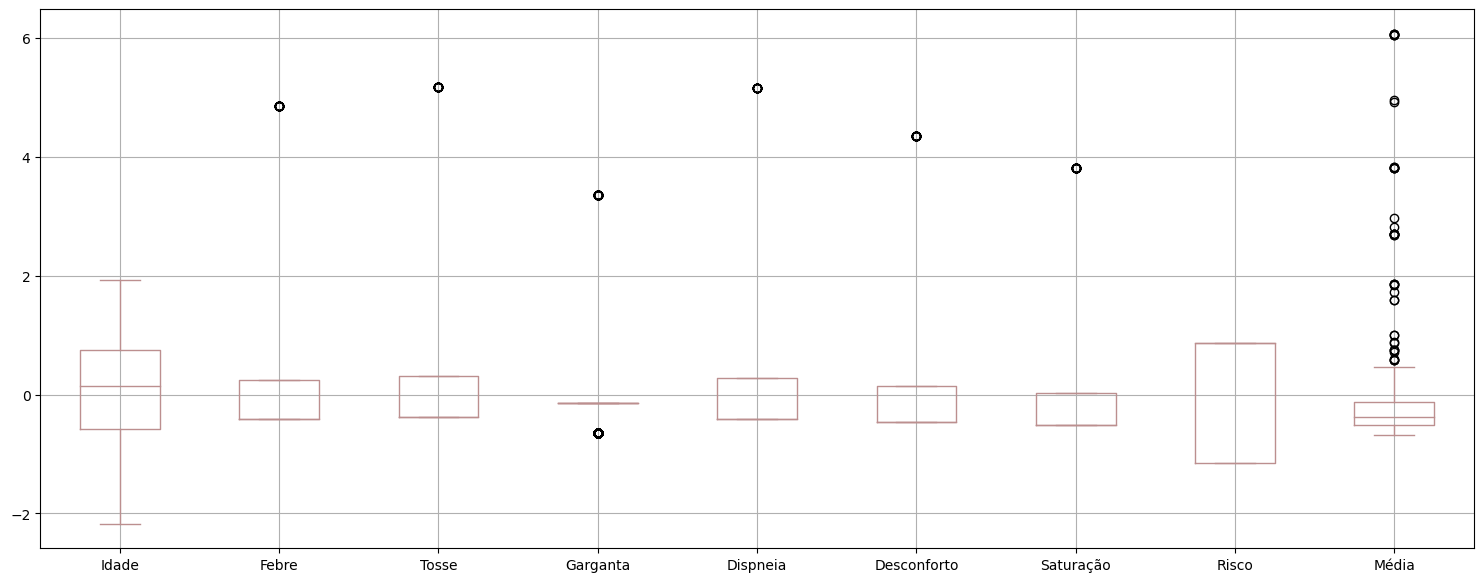

In [16]:
# Função que cria um boxplot para a database na identificação de outliers
df_amostra.boxplot(figsize=(18.5,7), color="#bc8f8f")
plt.show()

Outra forma de analisar se a base de dados contém outliers é usar gráficos de dispersão. Pode-se plotar gráficos de dispersão de todas as combinações de atributos da base de dados usando a função scatter_matrix da Pandas.

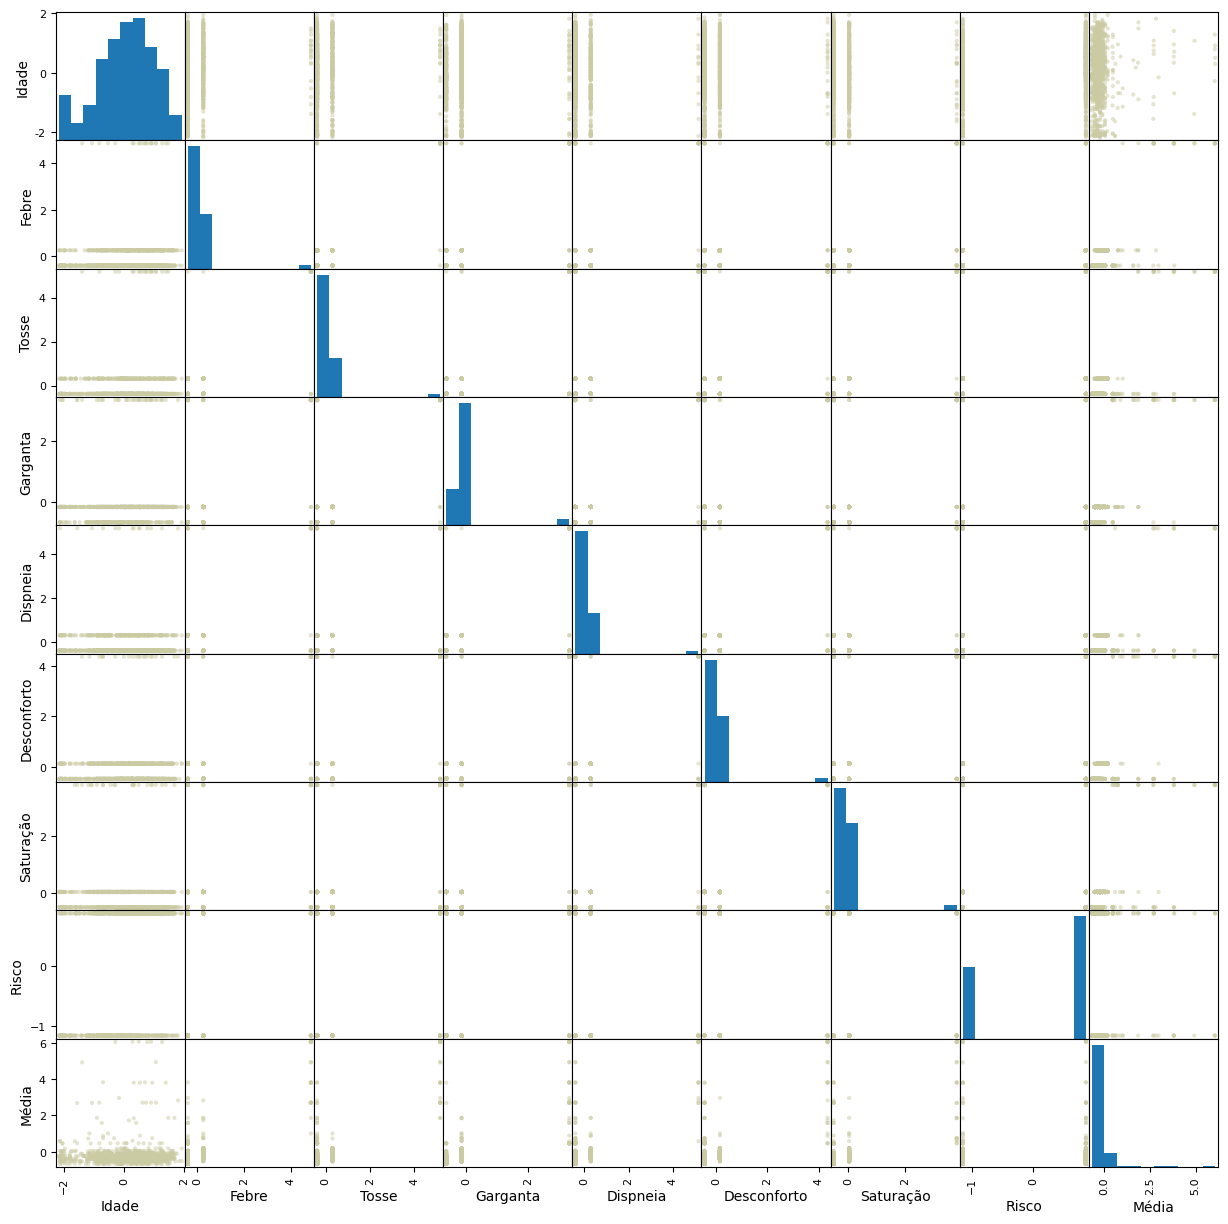

In [17]:
# Função para criar um gráfico de Dispersão na identificação de Outliers
pd.plotting.scatter_matrix(df_amostra, figsize=(15,15), color="#cacaa3")
plt.show()

Outra forma de plotar gráficos de dispersão a partir dos dataframes é usando a biblioteca Seaborn. Juntamente com essa biblioteca, também é recomendável importar a biblioteca Matplotlib para personalizar os gráficos.

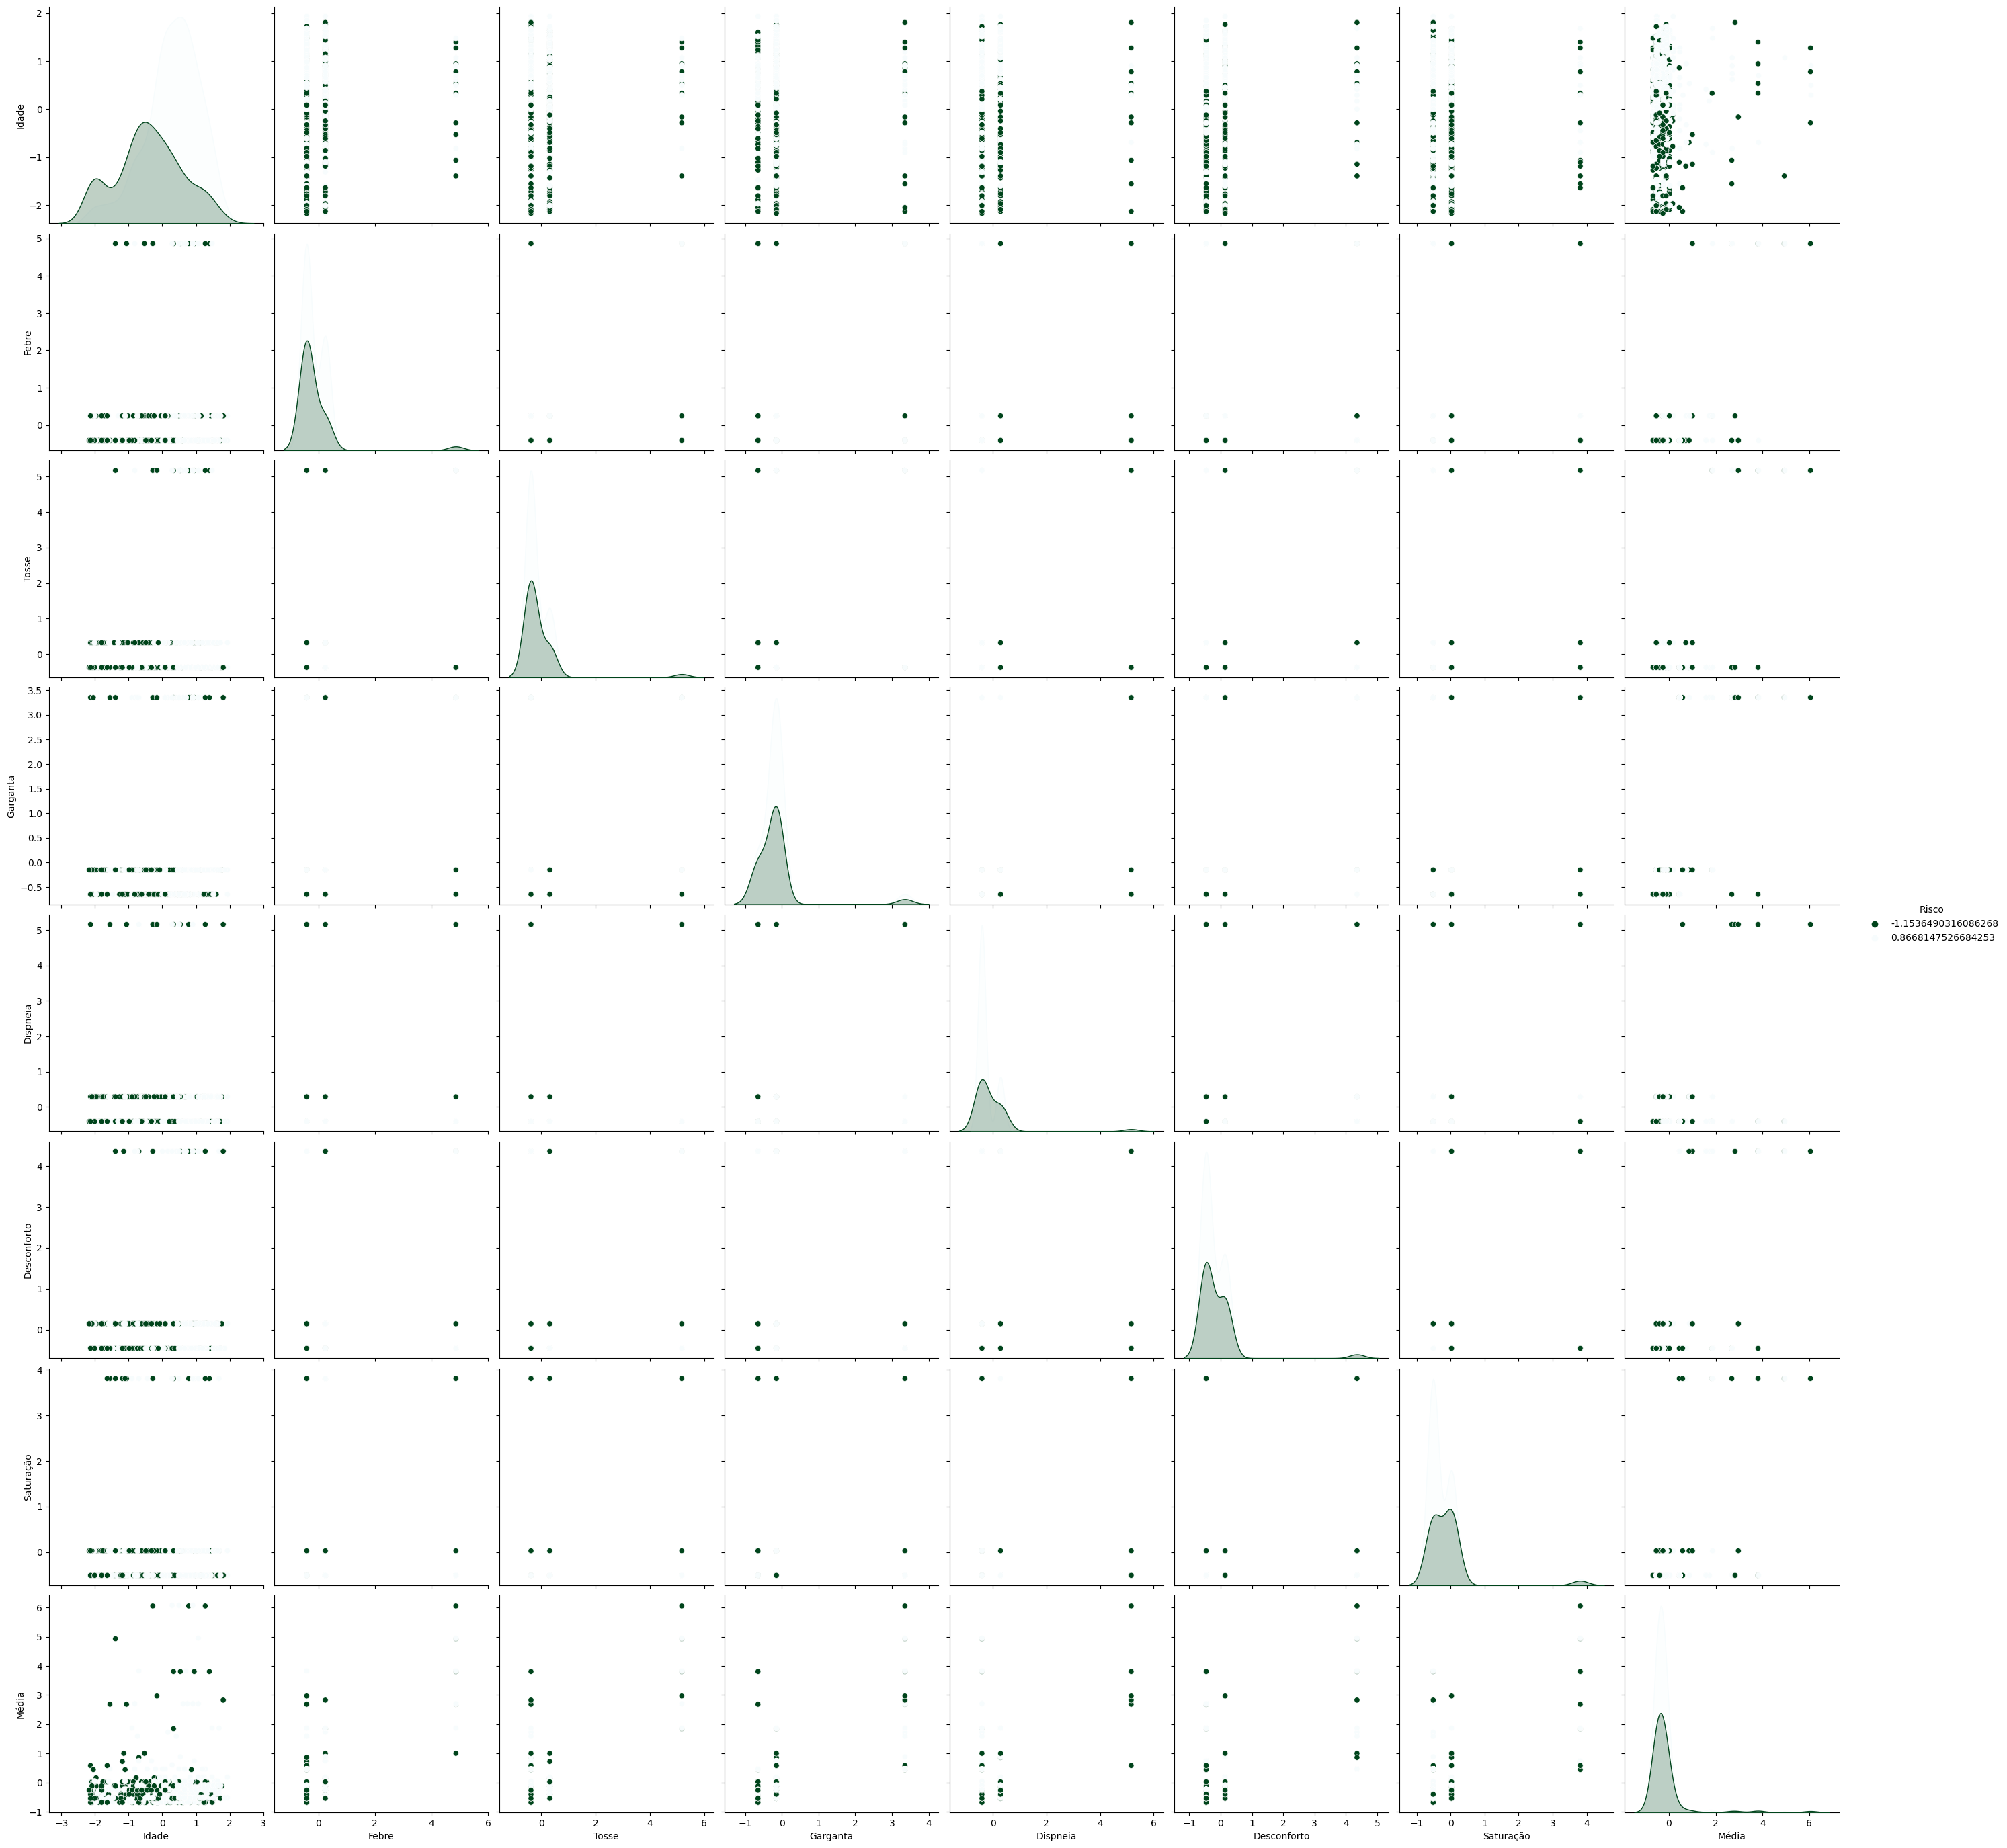

In [18]:
# Escolha uma paleta de cores do Seaborn
color_palette = 'BuGn_r'

# Crie o gráfico de dispersão com as cores definidas pela paleta
sns.pairplot(df_amostra, hue='Risco', palette=color_palette, height=3.5)

# Mostre o gráfico usando a função show() da matplotlib
plt.show()

A bilioteca Seaborn permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

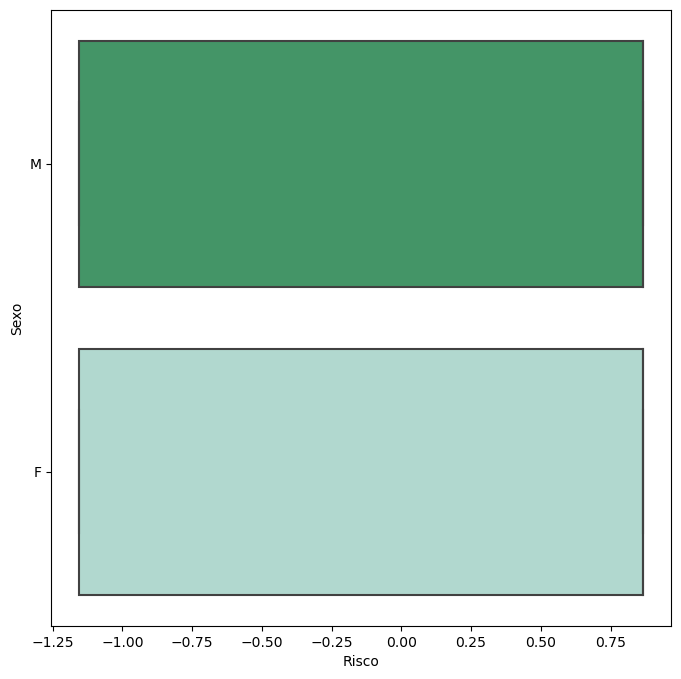

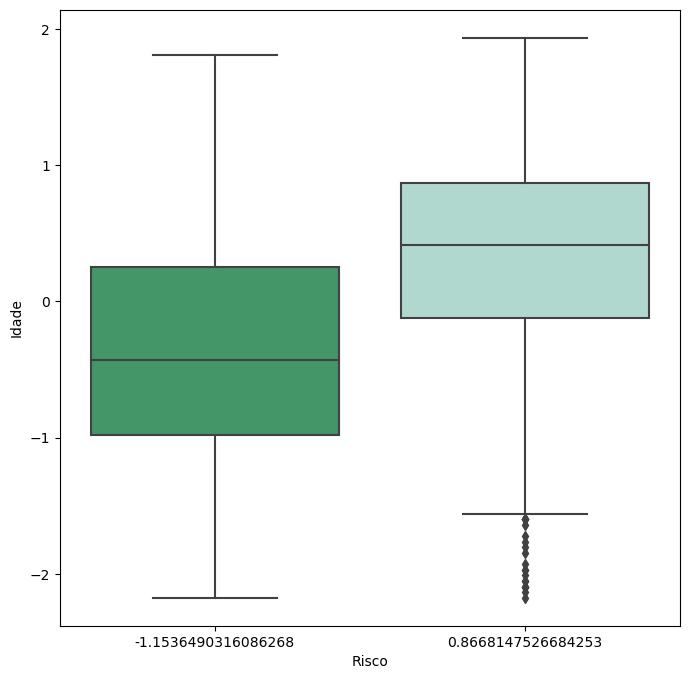

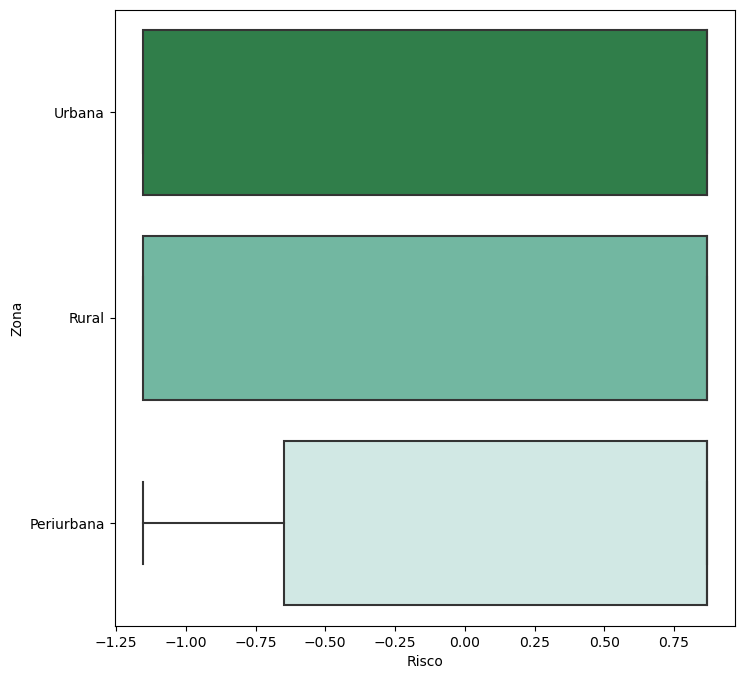

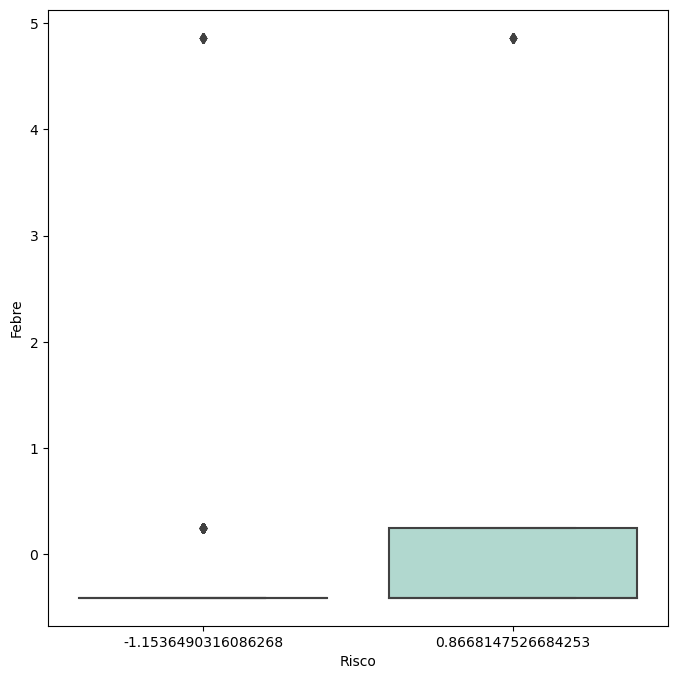

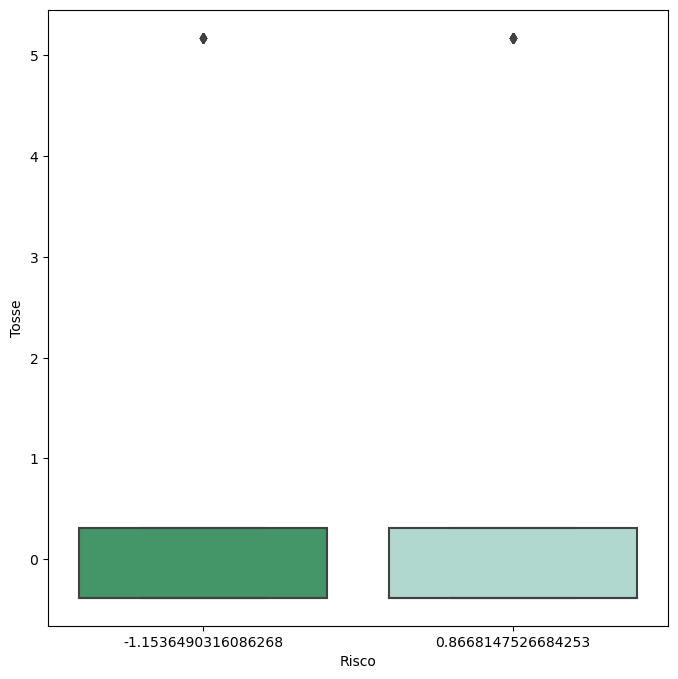

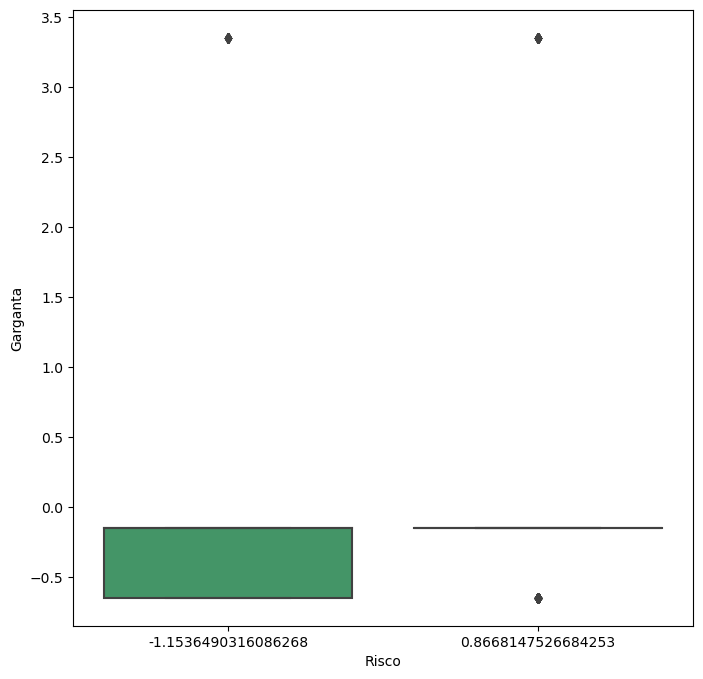

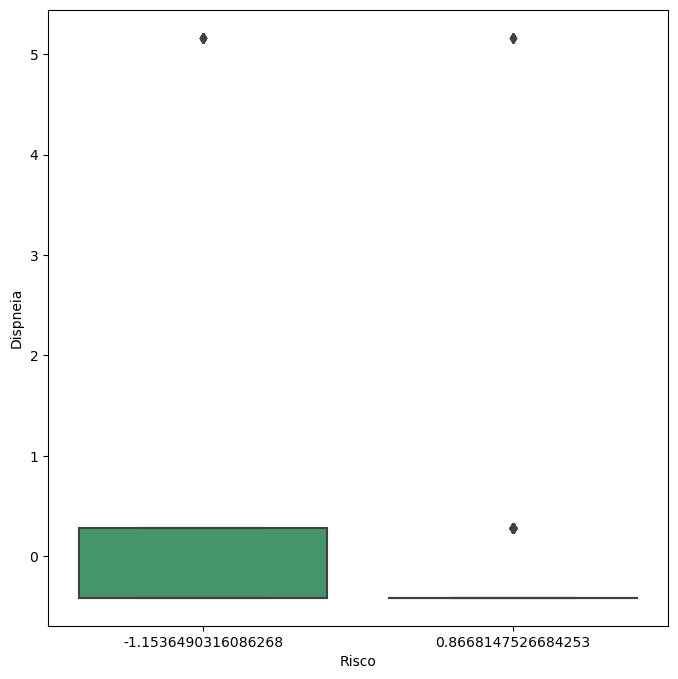

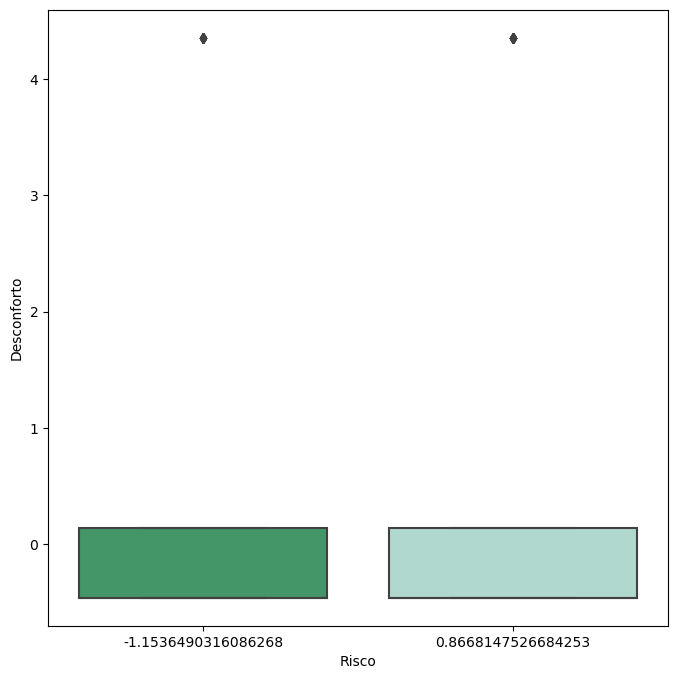

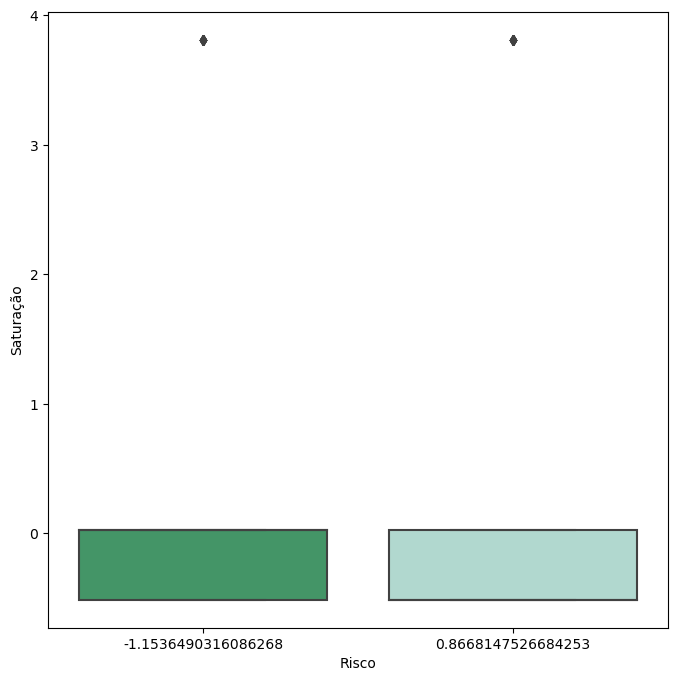

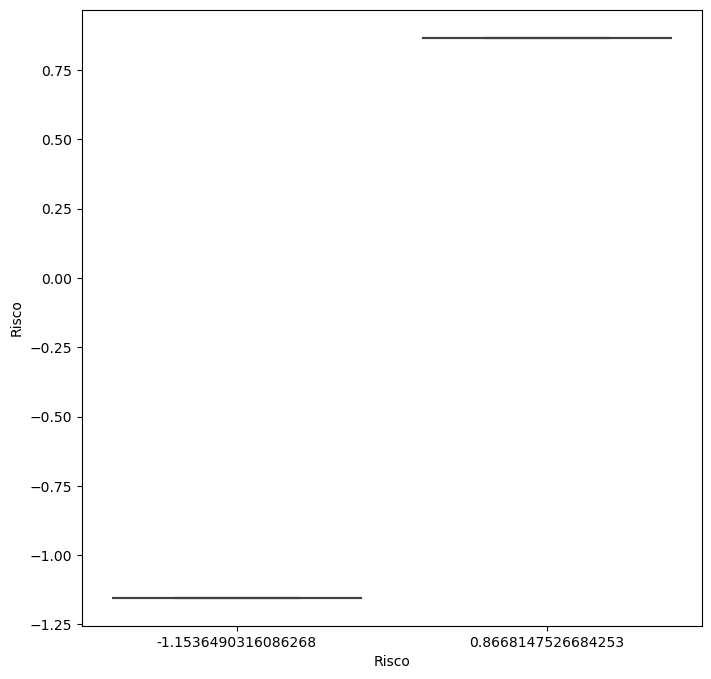

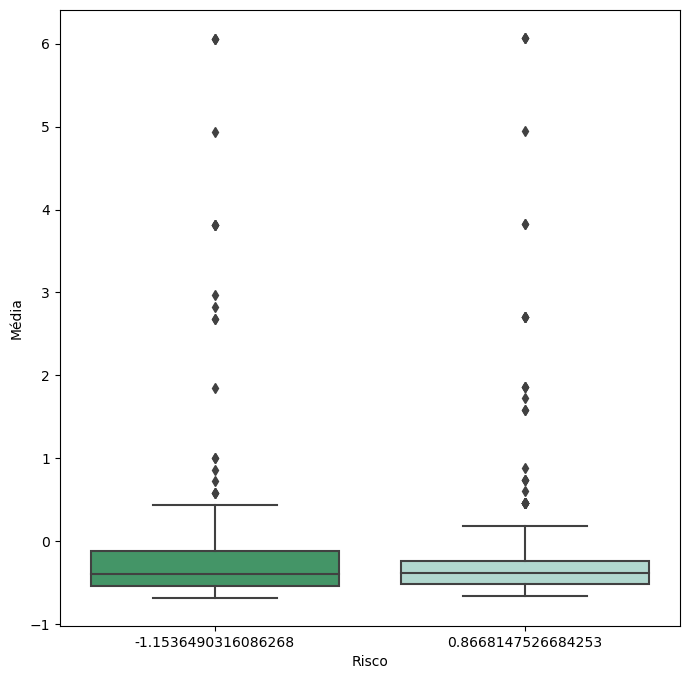

In [19]:
# Escolha uma paleta de cores do Seaborn
color_palette = 'BuGn_r'

# Loop para criar boxplots para cada atributo da Database
for atributo in df_amostra.columns[1:]:
    # Define a dimensão do gráfico
    plt.figure(figsize=(8, 8))

    # Cria o boxplot com as cores definidas pela paleta
    sns.boxplot(x="Risco", y=atributo, data=df_amostra, whis=1.5, palette=color_palette)

    # Mostra o gráfico
    plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, será usado para analisar cada atributo.

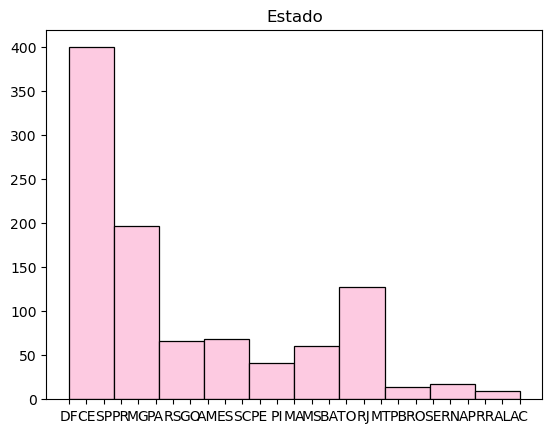

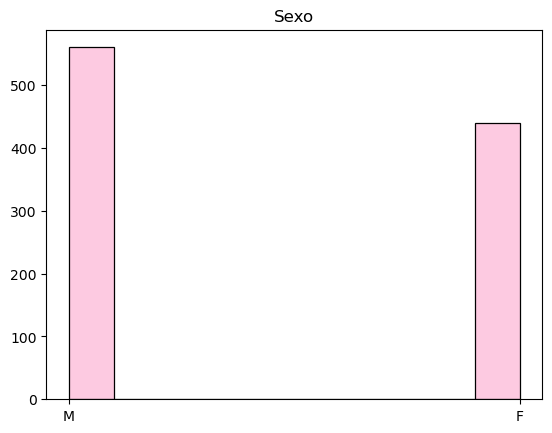

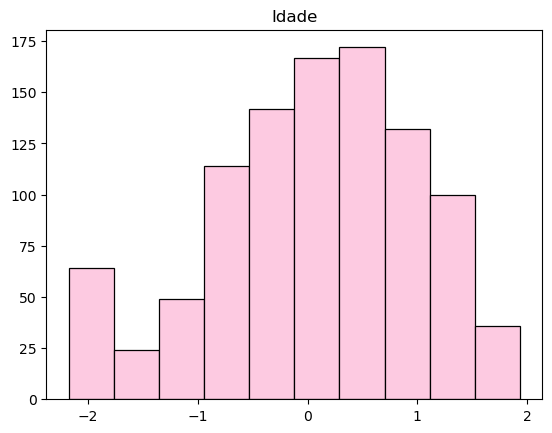

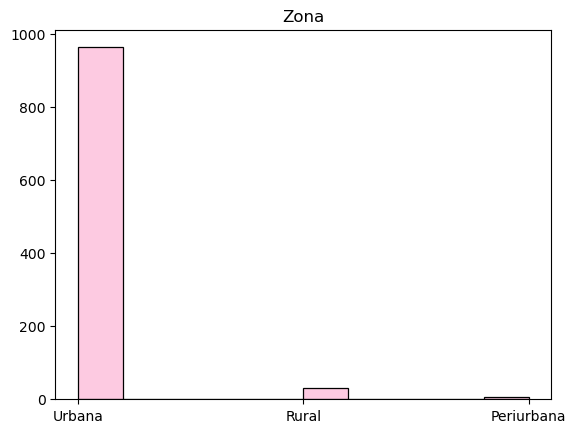

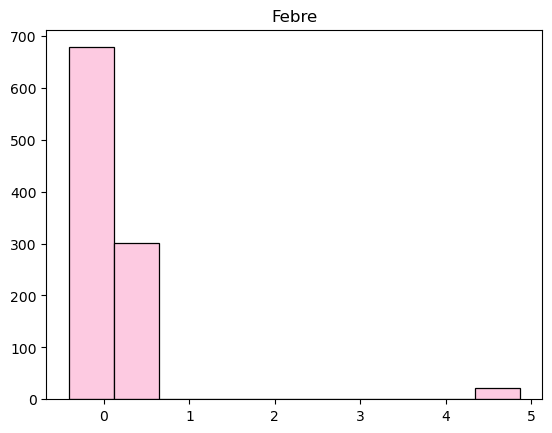

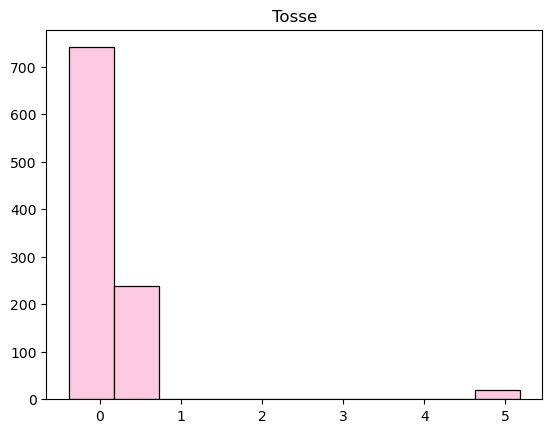

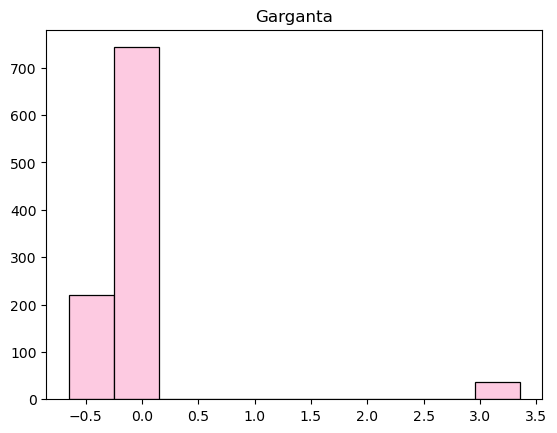

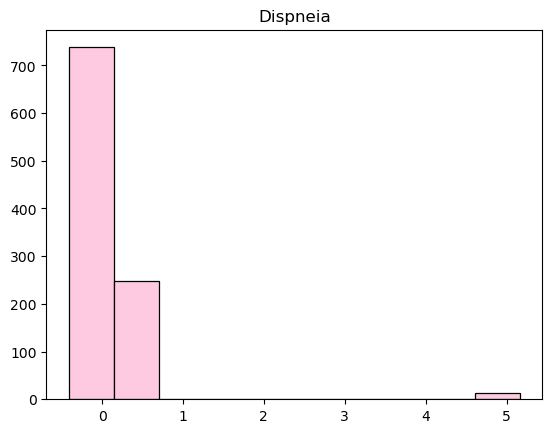

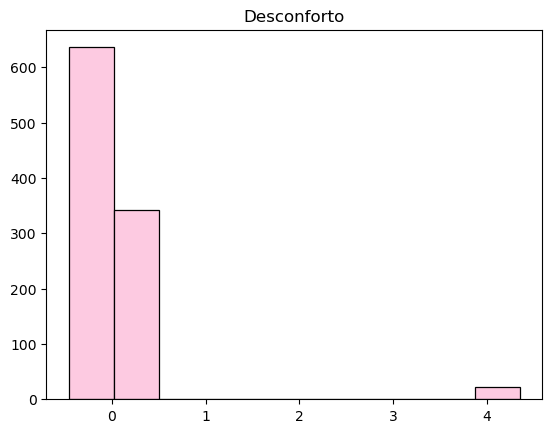

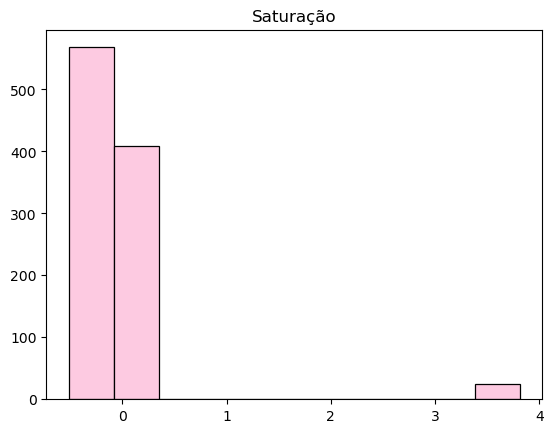

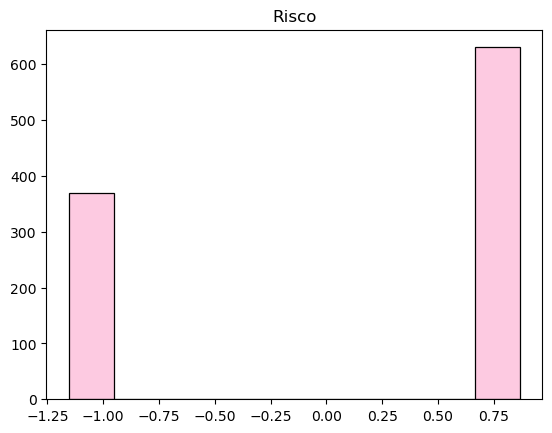

In [20]:
for atributo in df_amostra.columns[:-1]:
    
    # cria o histograma
    n, bins, patches = plt.hist(df_amostra[atributo].values,bins=10, color='#fdcae1', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

 0.866815    630
-1.153649    370
Name: Risco, dtype: int64

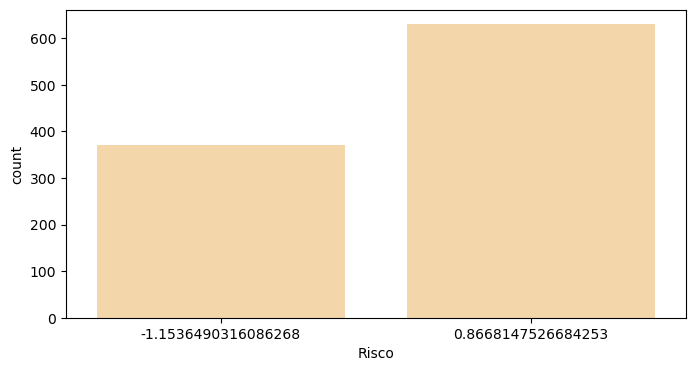

In [21]:
# Exibe a contagem de cada valor na coluna 'target'
display(df_amostra['Risco'].value_counts())

# Define a dimensão do gráfico
plt.figure(figsize=(8, 4))

# Cria um gráfico de barras com a frequência de cada valor em 'Risco' e define a cor das barras
sns.countplot(x="Risco", data=df_amostra, color='#ffda9e') 

# Mostra o gráfico
plt.show()

## Covariância e Correlação

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Pode-se fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

In [22]:
# Utilizando o Pandas
# matriz de covariancia
df_amostra_covariance = df_amostra.cov()

# matriz de correlação
df_amostra_correlation = df_amostra.corr()

print('Matriz de covariância: ')
display(df_amostra_covariance)

print('\n\nMatriz de correlação: ')
display(df_amostra_correlation)

Matriz de covariância: 


Idade     Febre     Tosse  Garganta  Dispneia  Desconforto  \
Idade        0.873414  0.089056  0.069267  0.027806 -0.023750     0.025120   
Febre        0.089056  0.619860  0.500148  0.301162  0.231763     0.242959   
Tosse        0.069267  0.500148  0.657143  0.312476  0.214828     0.255362   
Garganta     0.027806  0.301162  0.312476  0.508490  0.191433     0.224275   
Dispneia    -0.023750  0.231763  0.214828  0.191433  0.492824     0.238084   
Desconforto  0.025120  0.242959  0.255362  0.224275  0.238084     0.536745   
Saturação   -0.042743  0.214567  0.200599  0.161954  0.233321     0.188520   
Risco        0.330024  0.016705 -0.013167  0.028753 -0.089894    -0.021097   
Média        0.033915  0.476386  0.481345  0.402846  0.360710     0.387872   

             Saturação     Risco     Média  
Idade        -0.042743  0.330024  0.033915  
Febre         0.214567  0.016705  0.476386  
Tosse         0.200599 -0.013167  0.481345  
Garganta      0.161954  0.028753  0.402846  
Dispneia      0.233321 -0.089894  0.360710  
Desconforto   0.188520 -0.021097  0.387872  
Saturação     0.463231 -0.067777  0.341988  
Risco        -0.067777  0.952531 -0.022382  
Média         0.341988 -0.022382  0.563001



Matriz de correlação: 


Idade     Febre     Tosse  Garganta  Dispneia  Desconforto  \
Idade        1.000000  0.121034  0.091430  0.041725 -0.036200     0.036687   
Febre        0.121034  1.000000  0.783650  0.536430  0.419325     0.421214   
Tosse        0.091430  0.783650  1.000000  0.540561  0.377498     0.429974   
Garganta     0.041725  0.536430  0.540561  1.000000  0.382411     0.429295   
Dispneia    -0.036200  0.419325  0.377498  0.382411  1.000000     0.462914   
Desconforto  0.036687  0.421214  0.429974  0.429295  0.462914     1.000000   
Saturação   -0.067198  0.400421  0.363581  0.333698  0.488324     0.378072   
Risco        0.361822  0.021740 -0.016643  0.041314 -0.131203    -0.029505   
Média        0.048365  0.806413  0.791357  0.752911  0.684790     0.705585   

             Saturação     Risco     Média  
Idade        -0.067198  0.361822  0.048365  
Febre         0.400421  0.021740  0.806413  
Tosse         0.363581 -0.016643  0.791357  
Garganta      0.333698  0.041314  0.752911  
Dispneia      0.488324 -0.131203  0.684790  
Desconforto   0.378072 -0.029505  0.705585  
Saturação     1.000000 -0.102034  0.669664  
Risco        -0.102034  1.000000 -0.030564  
Média         0.669664 -0.030564  1.000000

<div class="alert alert-block alert-warning"
     <b> A variável "Risco" se destaca como a mais dominante em relação às demais variáveis do conjunto de dados,
    evidenciando sua importância na análise dos fatores associados. Para uma compreensão mais aprofundada de como essa
    variável interage com os sintomas, é essencial analisar seu mapa de calor em conjunto com as outras variáveis. 
    Essa visualização permitirá identificar padrões e correlações significativas, contribuindo para uma melhor interpretação
    dos dados e uma tomada de decisão mais informada. </b>
</div>

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Idade dos Pacientes'}>

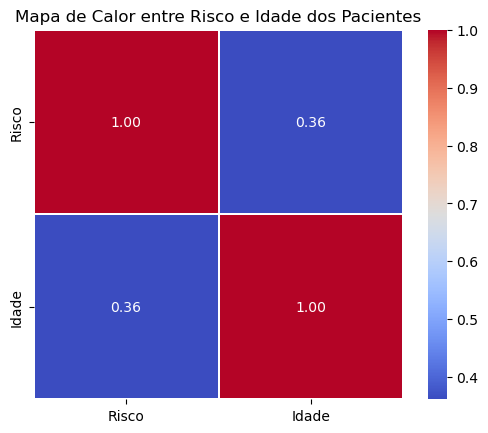

In [23]:
# Mapa de Calor entre Risco e Febre dos pacientes
plt.title("Mapa de Calor entre Risco e Idade dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Idade']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Febre dos Pacientes'}>

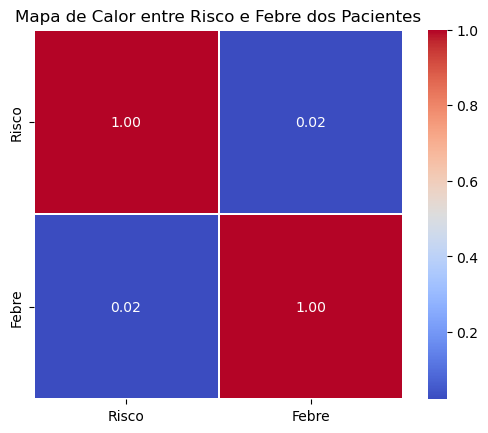

In [24]:
# Mapa de Calor entre Risco e Febre dos pacientes
plt.title("Mapa de Calor entre Risco e Febre dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Febre']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Tosse dos Pacientes'}>

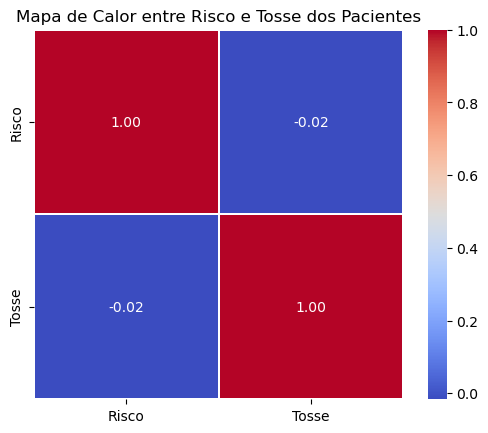

In [25]:
# Mapa de Calor entre Risco e Tosse dos pacientes
plt.title("Mapa de Calor entre Risco e Tosse dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Tosse']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Garganta dos Pacientes'}>

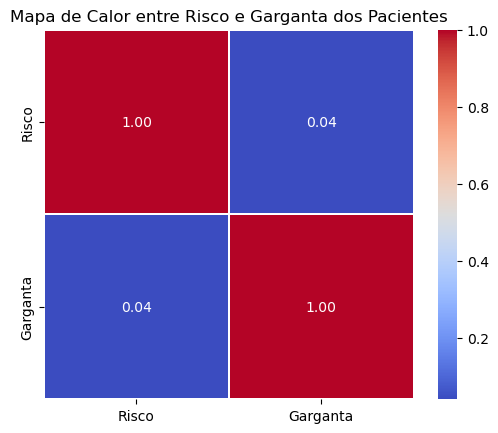

In [26]:
# Mapa de Calor entre Risco e Garganta dos pacientes
plt.title("Mapa de Calor entre Risco e Garganta dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Garganta']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Dispneia dos Pacientes'}>

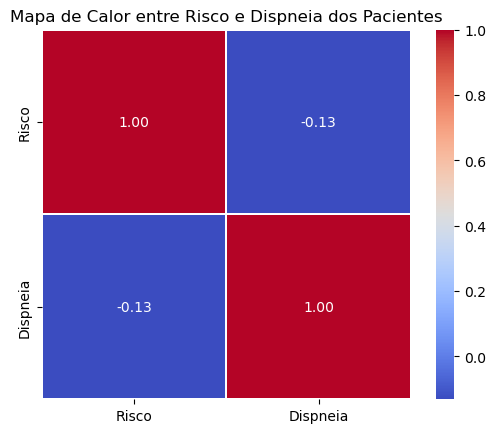

In [27]:
# Mapa de Calor entre Risco e Dispneia dos pacientes
plt.title("Mapa de Calor entre Risco e Dispneia dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Dispneia']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Desconforto dos Pacientes'}>

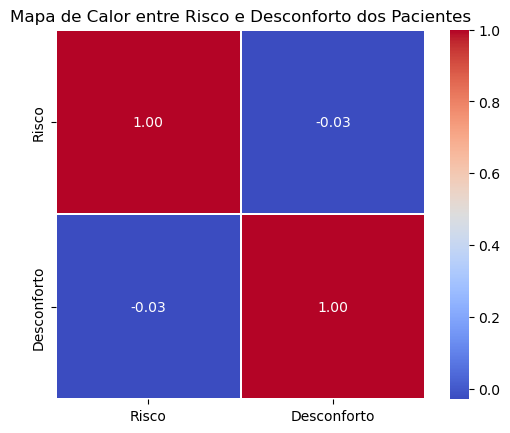

In [28]:
# Mapa de Calor entre Risco e Desconforto dos pacientes
plt.title("Mapa de Calor entre Risco e Desconforto dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Desconforto']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Saturação dos Pacientes'}>

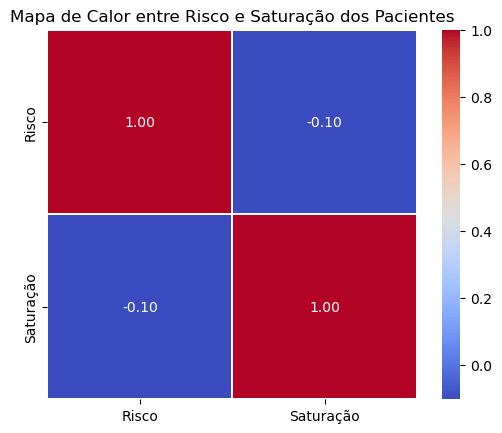

In [29]:
# Mapa de Calor entre Risco e Saturação dos pacientes
plt.title("Mapa de Calor entre Risco e Saturação dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Saturação']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<AxesSubplot:title={'center':'Mapa de Calor entre Risco e Média dos Pacientes'}>

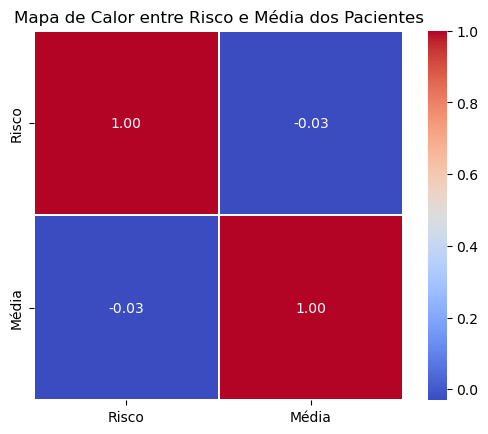

In [30]:
# Mapa de Calor entre Risco e Média dos pacientes
plt.title("Mapa de Calor entre Risco e Média dos Pacientes")
corr_col_e_pes = df_amostra[['Risco', 'Média']]
sns.heatmap(  corr_col_e_pes.corr(), cmap = 'coolwarm', linewidths= 0.1, linecolor='white',
              annot= True, fmt='.2f', square= True, cbar= True)

<div class="alert alert-block alert-info"
     <b> Os melhores resultados foram o Risco em relação a Idade, Febre e Garganta. </b>
</div>

## O Método Cotovelo

O método do cotovelo é uma técnica amplamente utilizada para determinar o número ideal de clusters em algoritmos de clustering, como o **K-means**. Ele funciona avaliando a variabilidade dentro dos clusters à medida que o número de clusters (K) aumenta. O objetivo é identificar o ponto em que adicionar mais clusters não traz uma melhoria significativa na qualidade do agrupamento, ou seja, quando a diminuição na soma dos quadrados dos erros (ou inércia) começa a ser mínima.

A lógica por trás do nome "cotovelo" é que, ao plotar o número de clusters contra a inércia, o gráfico tende a formar uma curva que se assemelha a um cotovelo, com uma queda inicial acentuada seguida por uma estabilização. O "cotovelo" desse gráfico é considerado o ponto ideal, indicando o número apropriado de clusters que melhor representa os dados, sem sobrecarregar o modelo com agrupamentos desnecessários.

Embora o método seja útil em muitos casos, ele pode ser subjetivo, e nem sempre o ponto de cotovelo é claramente visível, especialmente em dados complexos. Por isso, ele costuma ser complementado com outras técnicas, como a validação cruzada ou o uso de métricas adicionais para garantir a qualidade dos clusters.

In [31]:
# Criando função para o método cotovelo e encontrar o número de clusters

def calcular_wcss(df_amostra):
  wcss = []
  max_clusters = min(10, len(df_amostra))

  for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters = k, random_state=0, n_init= 10, max_iter= 300)
    kmeans.fit(X = df_amostra)
    wcss.append(kmeans.inertia_)
  return np.array(wcss)

In [32]:
# Criando dados dos pacientes
agrupamento_wcss = df_amostra[['Risco', 'Idade','Garganta','Febre']]

In [33]:
wcss_pacientes = calcular_wcss(agrupamento_wcss)

In [34]:
# Visualizando os dados obtidos do WCSS 
for i in range(len(wcss_pacientes)):
  print('O cluster', i, ' tem o valor', wcss_pacientes[i])

O cluster 0  tem o valor 2951.3408698423145
O cluster 1  tem o valor 1884.374032271359
O cluster 2  tem o valor 1207.3792447619453
O cluster 3  tem o valor 957.899128643032
O cluster 4  tem o valor 726.548231967783
O cluster 5  tem o valor 516.0315564695517
O cluster 6  tem o valor 439.19465701670515
O cluster 7  tem o valor 369.76827634327515
O cluster 8  tem o valor 322.3559910225686
O cluster 9  tem o valor 292.83492710262306


In [35]:
# Visualizando os dados obtidos do WCSS
grafico_wcss = px.line(x=range(1,11), y = wcss_pacientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando WCSS',
                  title_x= 0.5,
                  xaxis_title ='Número de Clusters',
                  yaxis_title ='Valor dos Clusters',
                  template='plotly_white')

<div class="alert alert-block alert-info"
     <b> O melhor resultado de clustering foi alcançado com \( k = 3 \), que se destaca como o toponômio do algoritmo K-means. Essa configuração revelou uma estrutura clara nos dados, permitindo a formação de três grupos bem definidos que capturam as variações essenciais entre as observações. A escolha de \( k = 3 \) não apenas otimizou a inércia, mas também proporcionou uma interpretação mais intuitiva dos clusters, facilitando a análise e a compreensão das relações entre os dados. Essa configuração é fundamental para orientar as decisões e estratégias futuras, uma vez que reflete a segmentação mais eficaz das informações disponíveis. </b>
</div>

## Silhouette Score

In [36]:
from sklearn.preprocessing import LabelEncoder

estado_encoder = LabelEncoder()
sexo_encoder = LabelEncoder()
zona_encoder = LabelEncoder()
df_clean['Estado'] = estado_encoder.fit_transform(df_clean['Estado'])
df_clean['Sexo'] = sexo_encoder.fit_transform(df_clean['Sexo'])
df_clean['Zona'] = zona_encoder.fit_transform(df_clean['Zona'])
df_clean

clustering_columns = ['Febre','Tosse','Garganta','Dispneia','Desconforto','Saturação','Risco']

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\1146406740.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\1146406740.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\1146406740.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Para 2 clusters o grau de silhueta médio é: 0.7426172828170644
Para 3 clusters o grau de silhueta médio é: 0.44286818781510573
Para 4 clusters o grau de silhueta médio é: 0.45904657365745194
Para 5 clusters o grau de silhueta médio é: 0.4979833390931124
Para 6 clusters o grau de silhueta médio é: 0.4960514302325434
Para 7 clusters o grau de silhueta médio é: 0.5159291020424207
Para 8 clusters o grau de silhueta médio é: 0.5307801449535887


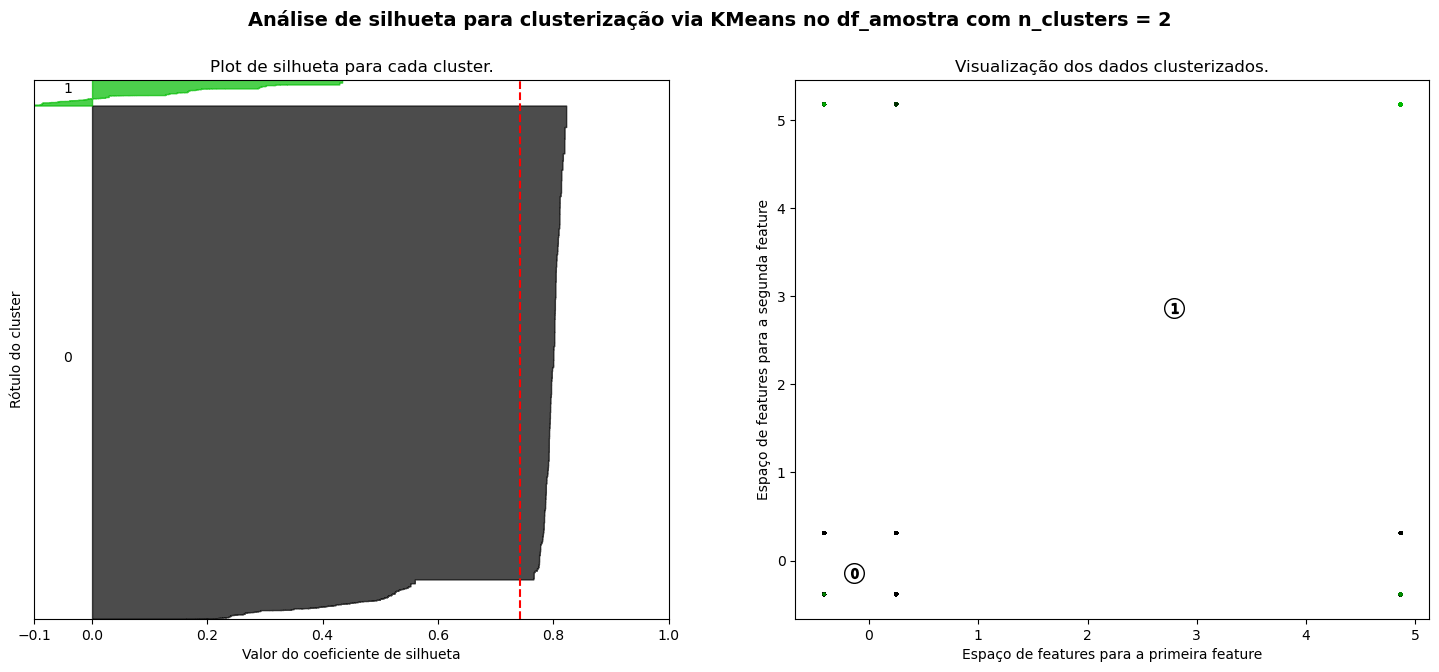

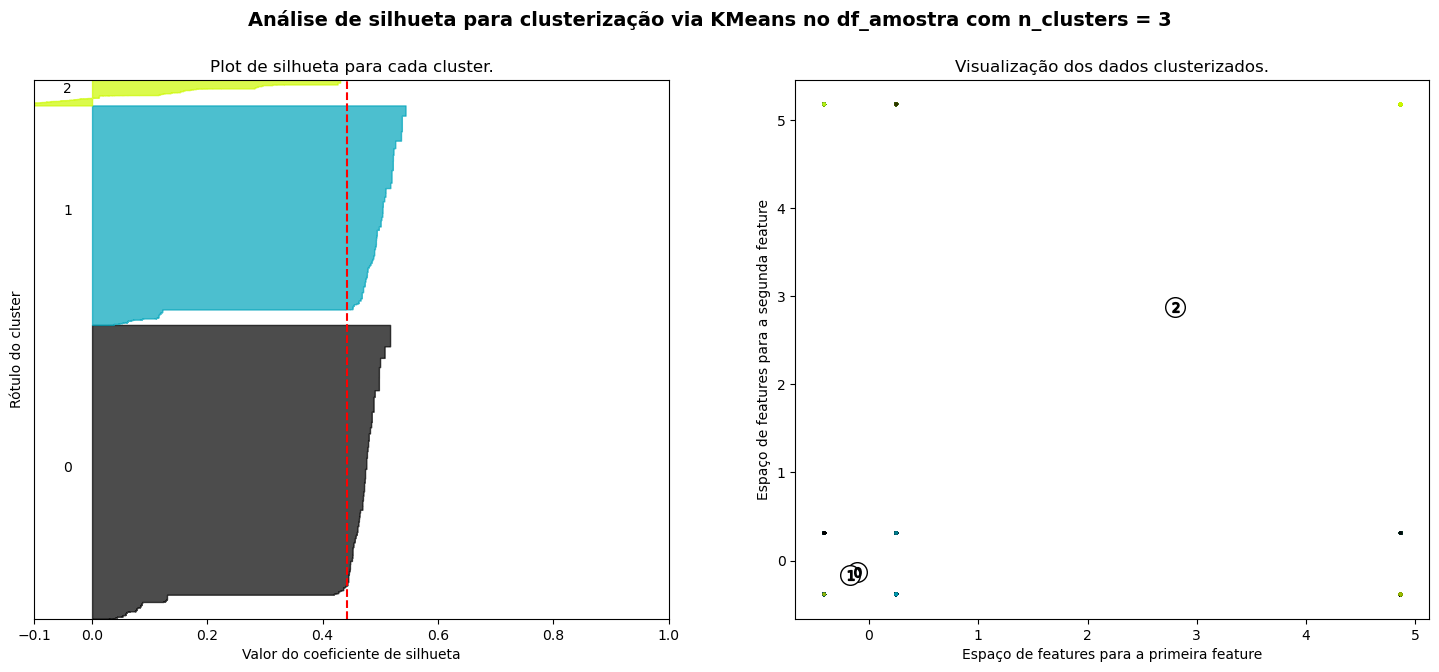

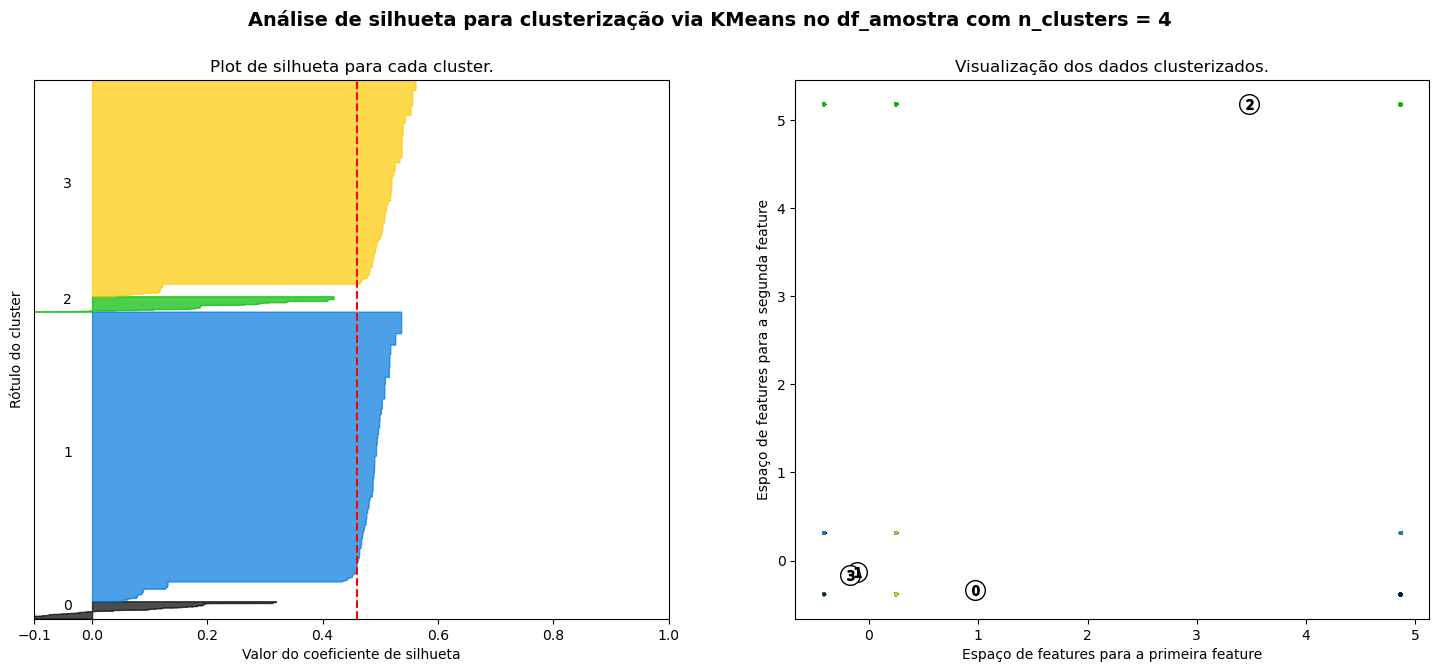

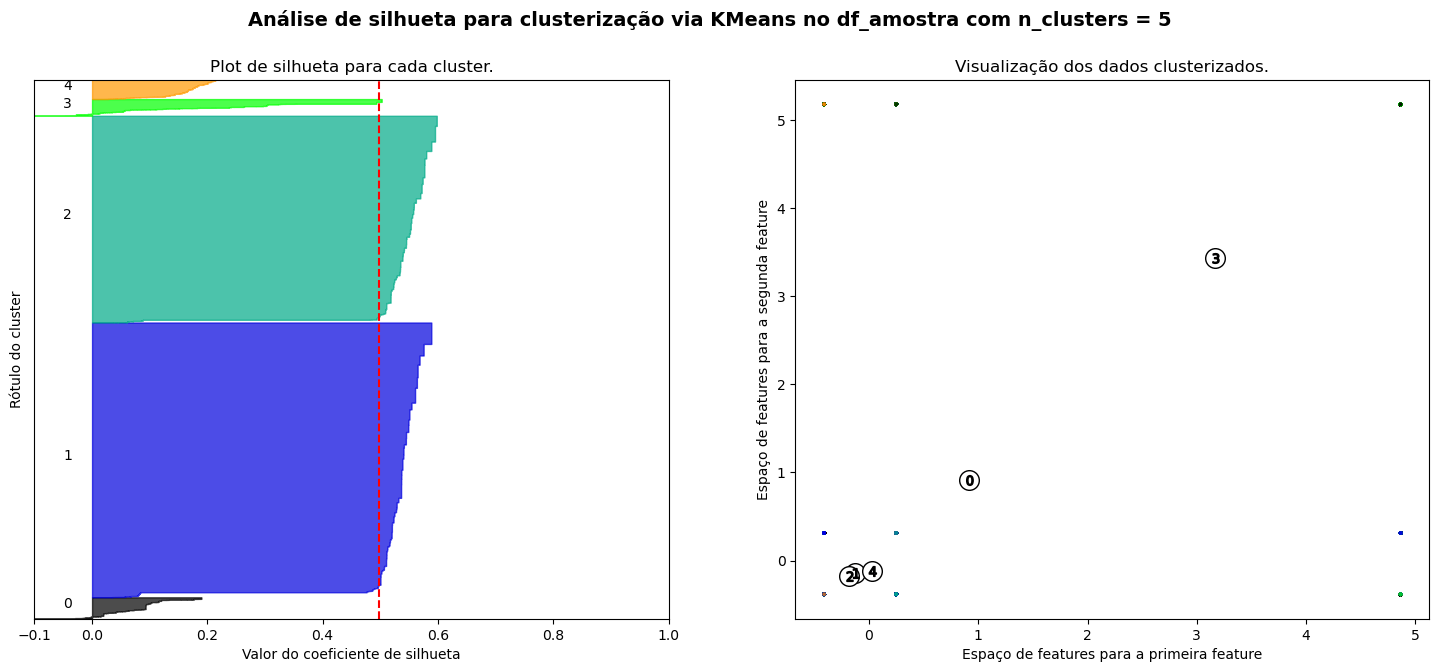

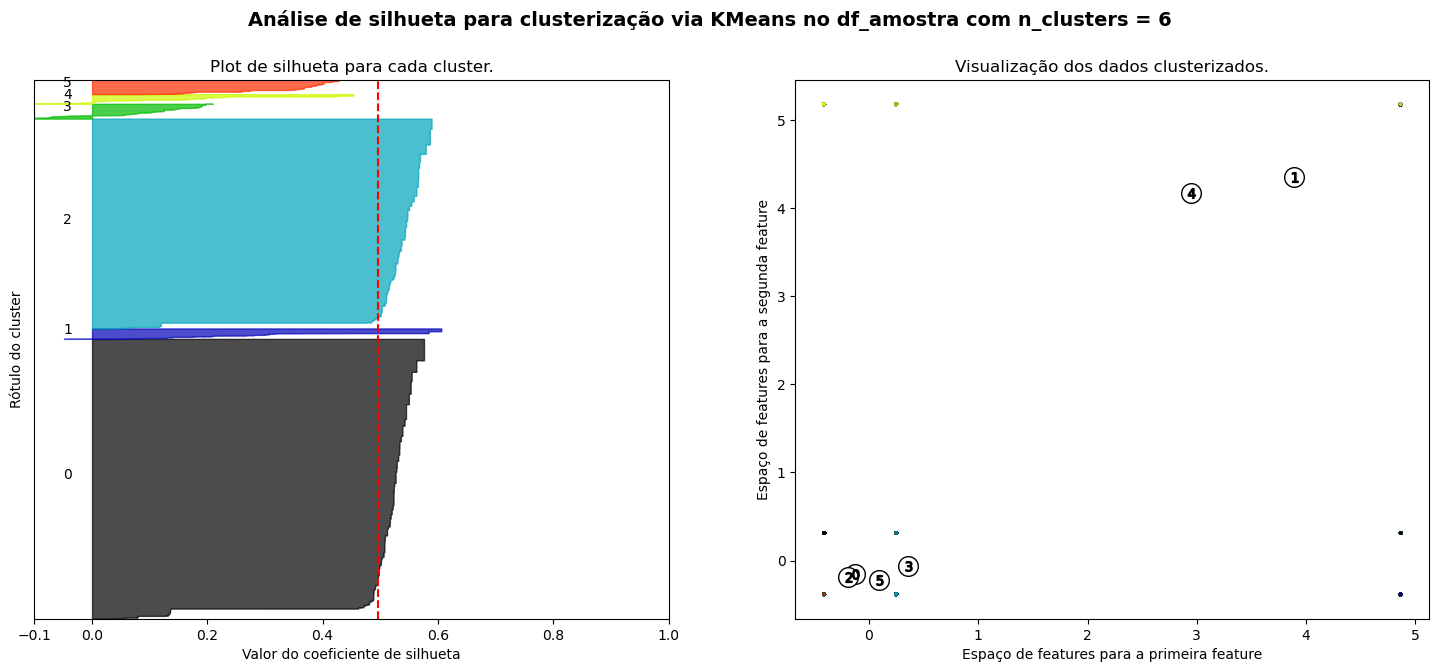

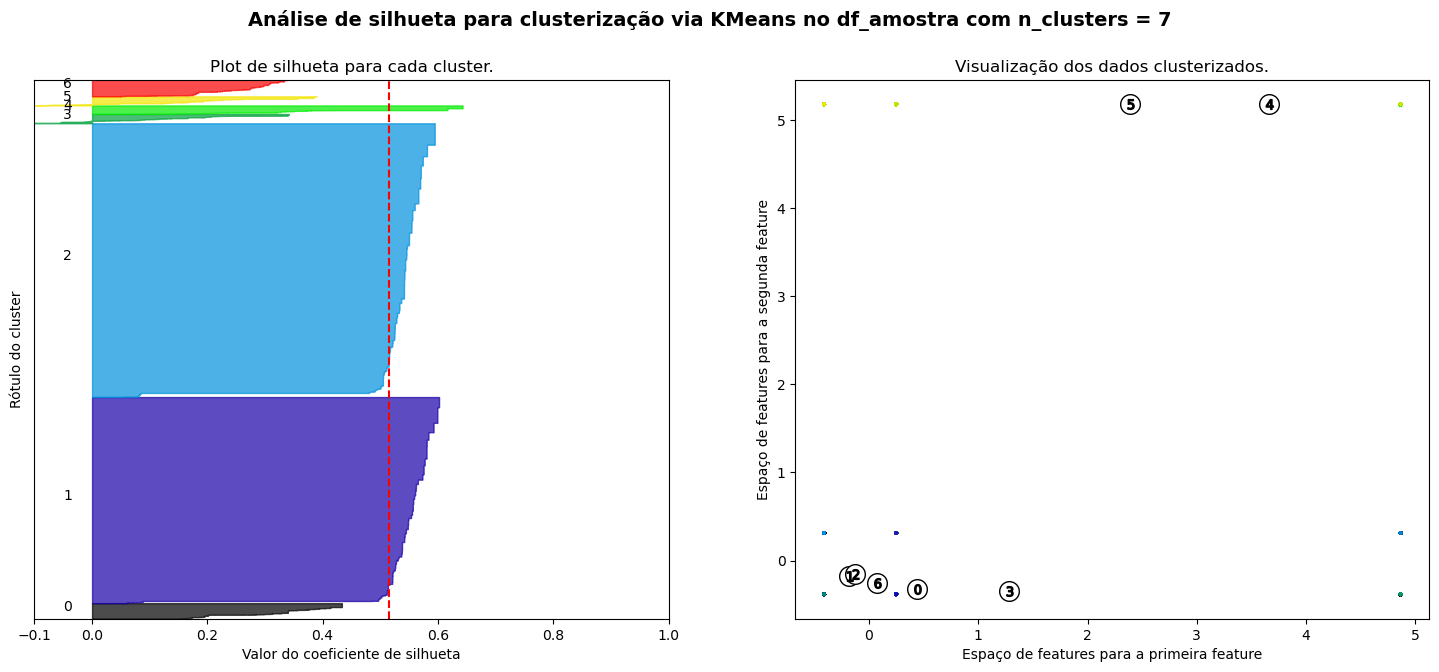

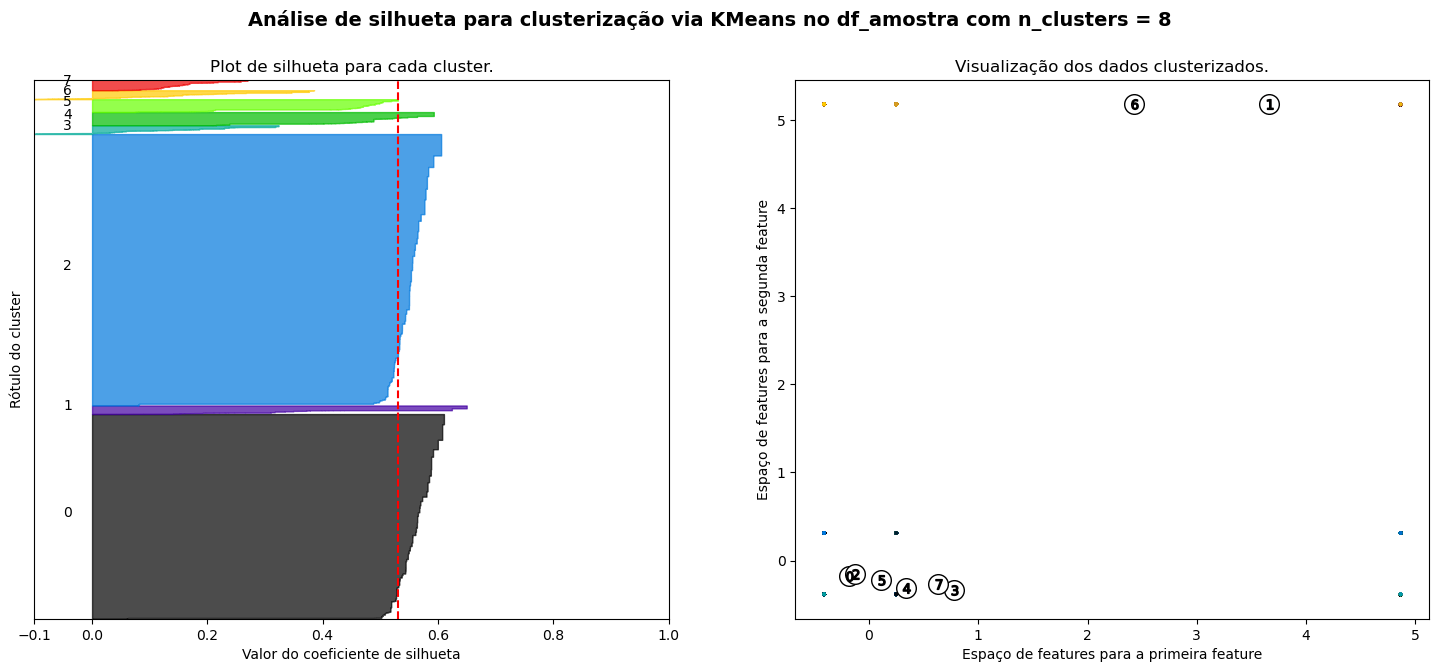

In [37]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm


range_n_cluster = range(2, 9)

for n_clusters in range_n_cluster:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(df_clean) + (n_clusters + 1) * 10])
  clusterer = KMeans(n_clusters=n_clusters, random_state=10)
  cluster_labels = clusterer.fit_predict(df_clean[clustering_columns])

  silhouette_avg = silhouette_score(df_clean[clustering_columns], cluster_labels)
  print(f"Para {n_clusters} clusters o grau de silhueta médio é: {silhouette_avg}")
  sample_silhouette_values = silhouette_samples(df_clean[clustering_columns], cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

  ax1.set_title("Plot de silhueta para cada cluster.")
  ax1.set_xlabel("Valor do coeficiente de silhueta")
  ax1.set_ylabel("Rótulo do cluster")

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax1.set_yticks([])
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(
        df_clean[clustering_columns].values[:, 0], df_clean[clustering_columns].values[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
  )

  centers = clusterer.cluster_centers_
  ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
  )

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

  ax2.set_title("Visualização dos dados clusterizados.")
  ax2.set_xlabel("Espaço de features para a primeira feature")
  ax2.set_ylabel("Espaço de features para a segunda feature")

  plt.suptitle(
        f"Análise de silhueta para clusterização via KMeans no df_amostra com n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
  )

plt.show()

## Agrupamento

O algoritmo de agrupamento, também conhecido como **clustering**, é uma técnica de aprendizado não supervisionado que visa organizar um conjunto de dados em grupos ou clusters com base em características semelhantes. Ao contrário dos métodos supervisionados, que dependem de rótulos pré-definidos, o clustering permite que os dados sejam analisados em sua forma bruta, revelando padrões e estruturas ocultas. Essa abordagem é amplamente utilizada em diversas áreas, como marketing, biologia, reconhecimento de padrões e análise de imagem, onde a segmentação dos dados é fundamental para obter insights valiosos.

Um dos algoritmos mais populares para clustering é o **K-means**. O K-means funciona dividindo os dados em \( k \) clusters, onde \( k \) é um número definido pelo usuário. O processo inicia com a seleção aleatória de \( k \) centróides, que servem como pontos de referência para cada cluster. Cada ponto de dado é então atribuído ao cluster mais próximo, com base na distância ao centróide. Após essa atribuição inicial, os centróides são recalculados como a média dos pontos que pertencem a cada cluster. Esse processo de atribuição e recalculação é repetido até que as mudanças nos centróides sejam mínimas ou até que um critério de convergência seja atingido.

O K-means é conhecido por sua simplicidade e eficiência, tornando-o uma escolha popular para muitas aplicações. No entanto, ele tem algumas limitações, como a necessidade de determinar o número de clusters \( k \) antecipadamente e sua sensibilidade à escolha dos centróides iniciais, o que pode resultar em diferentes soluções em execuções distintas. Para ajudar a determinar o valor mais adequado de \( k \), técnicas como o método do cotovelo podem ser utilizadas, que analisa a inércia dos clusters em relação ao número de clusters.

Em suma, o K-means é uma ferramenta poderosa e prática para análise de dados, permitindo a identificação de padrões significativos em grandes volumes de informações. Contudo, uma compreensão cuidadosa das suas limitações e a aplicação de métodos auxiliares são essenciais para otimizar seus resultados e obter insights significativos.

In [38]:
df_clean

Estado  Sexo     Idade  Zona     Febre     Tosse  Garganta  Dispneia  \
0            6     2 -2.133073     3 -0.409489 -0.382159 -0.147693  5.162593   
1            5     2 -1.804419     3 -0.409489 -0.382159 -0.147693 -0.410730   
2           25     0  0.167511     3 -0.409489 -0.382159 -0.147693 -0.410730   
3           25     2 -2.133073     3 -0.409489 -0.382159 -0.647749  0.285936   
4           17     0 -0.982781     3 -0.409489 -0.382159 -0.647749 -0.410730   
...        ...   ...       ...   ...       ...       ...       ...       ...   
403047      18     2 -2.009828     3 -0.409489 -0.382159 -0.147693 -0.410730   
403050      18     2 -1.845500     3  0.249710 -0.382159 -0.147693 -0.410730   
403060       3     0 -0.695208     3  0.249710  0.312665 -0.147693 -0.410730   
403061       1     2 -2.174155     3 -0.409489 -0.382159  3.352692  5.162593   
403068      23     2 -0.613044     2  0.249710 -0.382159 -0.147693 -0.410730   

        Desconforto  Saturação     Risco     Média  
0         -0.458263  -0.512366 -1.153649  0.582566  
1         -0.458263  -0.512366 -1.153649 -0.539306  
2         -0.458263  -0.512366  0.866815 -0.519674  
3         -0.458263   0.028144 -1.153649 -0.399072  
4          0.143313   0.028144 -1.153649 -0.399072  
...             ...        ...       ...       ...  
403047    -0.458263  -0.512366  0.866815 -0.519674  
403050    -0.458263  -0.512366 -1.153649 -0.399072  
403060    -0.458263  -0.512366 -1.153649 -0.258838  
403061    -0.458263   3.811715 -1.153649  2.686077  
403068    -0.458263  -0.512366 -1.153649 -0.399072  

[124200 rows x 12 columns]

In [39]:
# Para seed = 10 testar K = 3 e 5
# Para seed = 42 testar K = 7

kmeans = KMeans(n_clusters=6, random_state=10)
df_clean['Cluster'] = kmeans.fit_predict(df_clean[clustering_columns])

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\3058962683.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
df_clean['Estado'] = estado_encoder.inverse_transform(df_clean['Estado'])
df_clean['Sexo'] = sexo_encoder.inverse_transform(df_clean['Sexo'])
df_clean['Zona'] = zona_encoder.inverse_transform(df_clean['Zona'])
df_clean.head()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\2419124600.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\2419124600.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\2419124600.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

Estado Sexo     Idade    Zona     Febre     Tosse  Garganta  Dispneia  \
0     DF    M -2.133073  Urbana -0.409489 -0.382159 -0.147693  5.162593   
1     CE    M -1.804419  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
2     SP    F  0.167511  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
3     SP    M -2.133073  Urbana -0.409489 -0.382159 -0.647749  0.285936   
4     PR    F -0.982781  Urbana -0.409489 -0.382159 -0.647749 -0.410730   

   Desconforto  Saturação     Risco     Média  Cluster  
0    -0.458263  -0.512366 -1.153649  0.582566        2  
1    -0.458263  -0.512366 -1.153649 -0.539306        2  
2    -0.458263  -0.512366  0.866815 -0.519674        0  
3    -0.458263   0.028144 -1.153649 -0.399072        2  
4     0.143313   0.028144 -1.153649 -0.399072        2

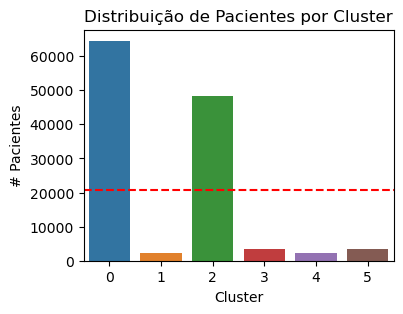

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_counts = df_clean['Cluster'].value_counts()

plt.figure(figsize=(4, 3))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
mean = cluster_counts.mean()
plt.axhline(mean, color='red', linestyle='--', label=f'Média: {mean:.2f}')
plt.title('Distribuição de Pacientes por Cluster')
plt.xlabel('Cluster')
plt.ylabel('# Pacientes')

plt.show()

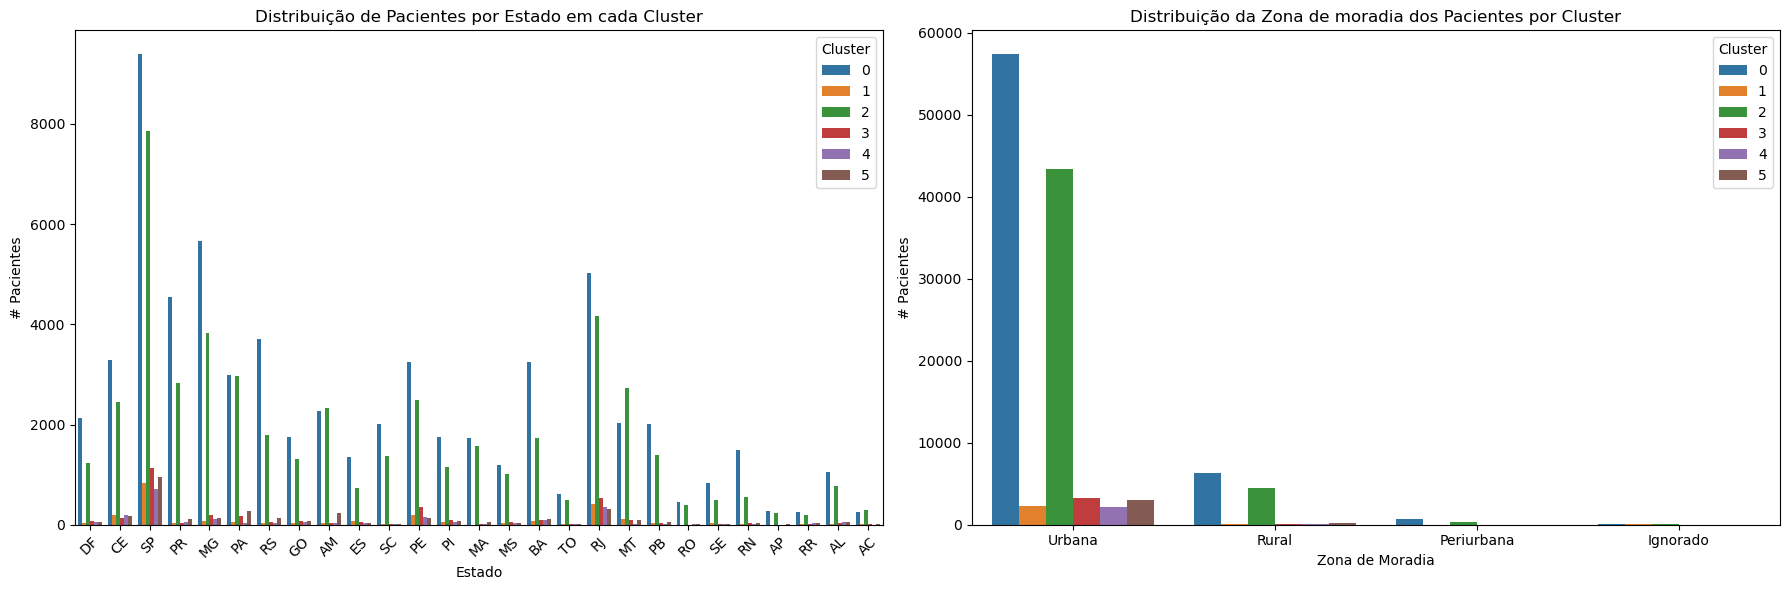

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(data=df_clean, x='Estado', hue='Cluster', palette='tab10', ax=axes[0])
axes[0].set_title('Distribuição de Pacientes por Estado em cada Cluster')
axes[0].set_xlabel('Estado')
axes[0].set_ylabel('# Pacientes')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_clean, x='Zona', hue='Cluster', palette='tab10', ax=axes[1])
axes[1].set_title('Distribuição da Zona de moradia dos Pacientes por Cluster')
axes[1].set_xlabel('Zona de Moradia')
axes[1].set_ylabel('# Pacientes')

#sns.countplot(data=df_clean, x='Idade')

plt.tight_layout()

plt.show()

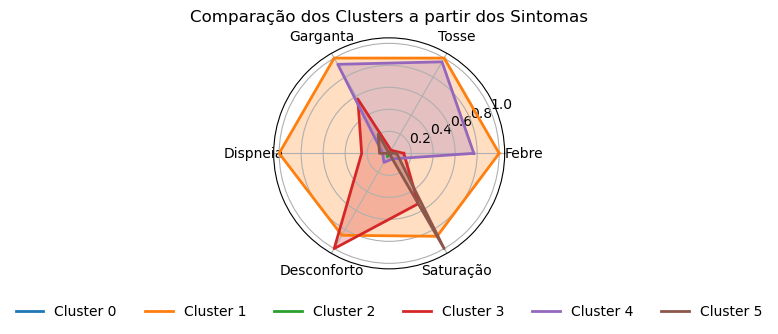

In [43]:
import matplotlib.pyplot as plt
from math import pi

numerical_columns = ['Febre', 'Tosse', 'Garganta', 'Dispneia', 'Desconforto', 'Saturação']
df_numerical = df_clean[numerical_columns + ['Cluster']]

df_grouped = df_numerical.groupby('Cluster').mean()

df_normalized = (df_grouped - df_grouped.min()) / (df_grouped.max() - df_grouped.min())

categories = df_normalized.columns
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(4, 3), subplot_kw=dict(polar=True))

for index, row in df_normalized.iterrows():
    data = row.tolist()
    data += data[:1]
    ax.plot(angles, data, linewidth=2, linestyle='solid', label=f'Cluster {index}')
    ax.fill(angles, data, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Comparação dos Clusters a partir dos Sintomas')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(df_normalized.index), frameon=False)

plt.show()


In [44]:
df_clean[df_clean['Cluster'] == 0]

Estado Sexo     Idade    Zona     Febre     Tosse  Garganta  Dispneia  \
2          SP    F  0.167511  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
6          PA    M  0.003184  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
7          MG    F -1.064945  Urbana -0.409489 -0.382159 -0.647749  0.285936   
9          SP    F  0.167511  Urbana  0.249710 -0.382159 -0.647749 -0.410730   
12         PR    M  0.824821  Urbana  0.249710 -0.382159 -0.647749  0.285936   
...       ...  ...       ...     ...       ...       ...       ...       ...   
403026     ES    M -1.557927  Urbana -0.409489  0.312665 -0.147693  0.285936   
403029     PI    M  0.414002  Urbana -0.409489 -0.382159 -0.647749  0.285936   
403031     DF    M  0.085347  Urbana  0.249710 -0.382159 -0.147693  0.285936   
403043     MT    F -0.736290  Urbana -0.409489  0.312665 -0.647749 -0.410730   
403047     RJ    M -2.009828  Urbana -0.409489 -0.382159 -0.147693 -0.410730   

        Desconforto  Saturação     Risco     Média  Cluster  
2         -0.458263  -0.512366  0.866815 -0.519674        0  
6         -0.458263   0.028144  0.866815 -0.379440        0  
7          0.143313   0.028144  0.866815 -0.239205        0  
9         -0.458263  -0.512366  0.866815 -0.519674        0  
12        -0.458263   0.028144  0.866815 -0.239205        0  
...             ...        ...       ...       ...      ...  
403026    -0.458263  -0.512366  0.866815 -0.239205        0  
403029    -0.458263  -0.512366  0.866815 -0.519674        0  
403031     0.143313   0.028144  0.866815  0.041263        0  
403043    -0.458263  -0.512366  0.866815 -0.519674        0  
403047    -0.458263  -0.512366  0.866815 -0.519674        0  

[64507 rows x 13 columns]

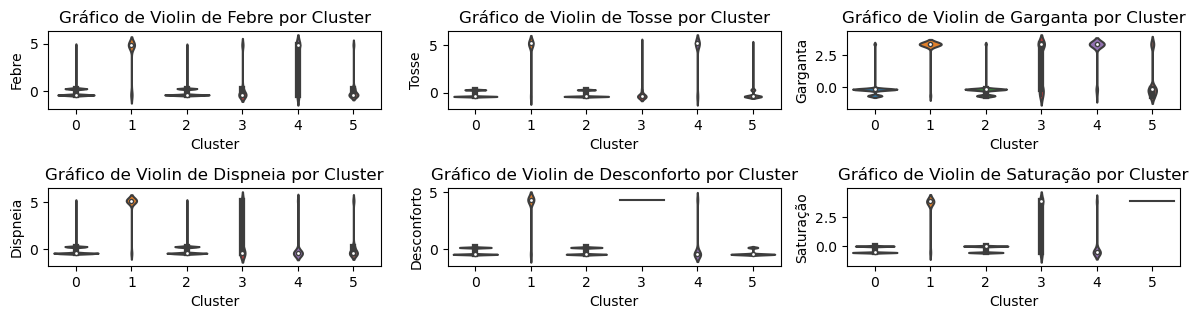

In [45]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['Febre', 'Tosse', 'Garganta', 'Dispneia', 'Desconforto', 'Saturação'], 1):
    plt.subplot(4, 3, i)
    sns.violinplot(data=df_clean, x='Cluster', y=column)
    plt.title(f'Gráfico de Violin de {column} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

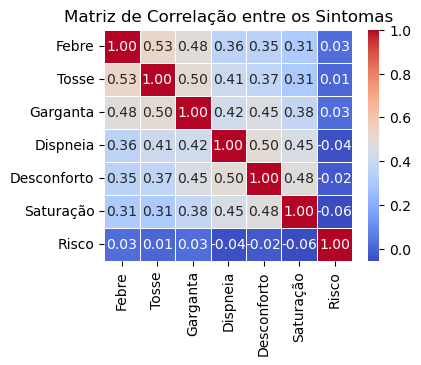

In [46]:
correlation_matrix = df_clean[clustering_columns].corr()

plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=0.5)
plt.title('Matriz de Correlação entre os Sintomas')
plt.show()

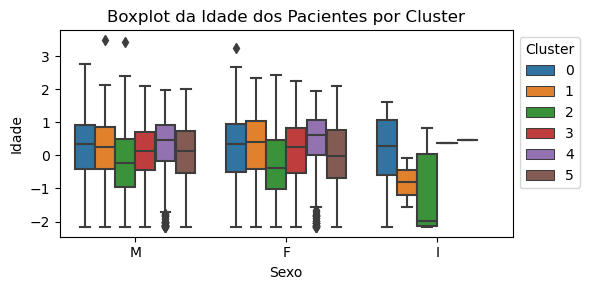

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df_clean, x='Sexo', y='Idade', hue='Cluster', palette='tab10')
plt.title('Boxplot da Idade dos Pacientes por Cluster')
plt.xlabel('Sexo')
plt.ylabel('Idade')

plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1), frameon=True)

plt.tight_layout()
plt.show()

In [48]:
# Aplicando algoritmo KMeans
kmeans_pacientes = KMeans(n_clusters=3, random_state=0, n_init=10, max_iter=300)
df_amostra['Clusters'] = kmeans_pacientes.fit_predict(agrupamento_wcss)

# Visualizando os Clusters
df_amostra.head()

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\1809266058.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Estado Sexo     Idade    Zona     Febre     Tosse  Garganta  Dispneia  \
0     DF    M -2.133073  Urbana -0.409489 -0.382159 -0.147693  5.162593   
1     CE    M -1.804419  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
2     SP    F  0.167511  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
3     SP    M -2.133073  Urbana -0.409489 -0.382159 -0.647749  0.285936   
4     PR    F -0.982781  Urbana -0.409489 -0.382159 -0.647749 -0.410730   

   Desconforto  Saturação     Risco     Média  Clusters  
0    -0.458263  -0.512366 -1.153649  0.582566         0  
1    -0.458263  -0.512366 -1.153649 -0.539306         0  
2    -0.458263  -0.512366  0.866815 -0.519674         1  
3    -0.458263   0.028144 -1.153649 -0.399072         0  
4     0.143313   0.028144 -1.153649 -0.399072         0

In [49]:
centr_cluster = kmeans_pacientes.cluster_centers_
centr_cluster

array([[-1.15364903, -0.40489622, -0.23242497, -0.26116889],
       [ 0.86681475,  0.30495954, -0.16142675, -0.17520153],
       [-0.09531086,  0.45117168,  2.63832787,  4.86409867]])

In [50]:
# Scatter plot dos dados do cliente
grafico = go.Scatter(x=df_amostra['Idade'], y=df_amostra['Média'], mode='markers', 
                     marker=dict(color=df_amostra['Clusters'], colorscale='Viridis'), name='Pacientes')

# Scatter plot dos centroides dos clusters
grafico_centr = go.Scatter(x=centr_cluster[:, 0], y=centr_cluster[:, 2], mode='markers', 
                           marker=dict(size=10, color='red'), name='Centroides')

# Combinação dos dois gráficos em um único gráfico
grafico_final = go.Figure(data=[grafico, grafico_centr])

# Customizando o layout
grafico_final.update_layout(
    title='Análise de Agrupamento',
    xaxis_title='Média',
    yaxis_title='Idade',
    template='plotly_white',
    title_x=0.5
)

# Mostrando o gráfico
grafico_final.show()


In [51]:
# Agrupamento resultante dos pacientes com base em situação da SRAG
df_amostra.loc[df_amostra['Clusters']==0, 'Situação'] = 'SG'
df_amostra.loc[df_amostra['Clusters']==1, 'Situação'] = 'Alto Risco'
df_amostra.loc[df_amostra['Clusters']==2, 'Situação'] = 'SRAG'

df_amostra

C:\Users\Ryan\AppData\Local\Temp\ipykernel_1524\3111790561.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Estado Sexo     Idade    Zona     Febre     Tosse  Garganta  Dispneia  \
0        DF    M -2.133073  Urbana -0.409489 -0.382159 -0.147693  5.162593   
1        CE    M -1.804419  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
2        SP    F  0.167511  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
3        SP    M -2.133073  Urbana -0.409489 -0.382159 -0.647749  0.285936   
4        PR    F -0.982781  Urbana -0.409489 -0.382159 -0.647749 -0.410730   
...     ...  ...       ...     ...       ...       ...       ...       ...   
1496     MA    M  0.989149  Urbana -0.409489 -0.382159 -0.147693 -0.410730   
1498     SP    M  0.003184  Urbana -0.409489 -0.382159 -0.647749 -0.410730   
1499     PR    F -0.489799  Urbana -0.409489  0.312665 -0.147693  0.285936   
1502     AM    M  0.455084  Urbana -0.409489 -0.382159 -0.147693  0.285936   
1503     MA    F  0.085347  Urbana -0.409489 -0.382159 -0.647749  0.285936   

      Desconforto  Saturação     Risco     Média  Clusters    Situação  
0       -0.458263  -0.512366 -1.153649  0.582566         0          SG  
1       -0.458263  -0.512366 -1.153649 -0.539306         0          SG  
2       -0.458263  -0.512366  0.866815 -0.519674         1  Alto Risco  
3       -0.458263   0.028144 -1.153649 -0.399072         0          SG  
4        0.143313   0.028144 -1.153649 -0.399072         0          SG  
...           ...        ...       ...       ...       ...         ...  
1496     0.143313   0.028144  0.866815 -0.239205         1  Alto Risco  
1498     4.354341  -0.512366  0.866815  0.461965         1  Alto Risco  
1499     0.143313   0.028144 -1.153649  0.021630         0          SG  
1502     0.143313   0.028144  0.866815 -0.098971         1  Alto Risco  
1503     0.143313   0.028144 -1.153649 -0.258838         0          SG  

[1000 rows x 14 columns]

## Considerações Finais

<AxesSubplot:title={'center':'Gráfico de boxplot'}, xlabel='Idade', ylabel='Estado'>

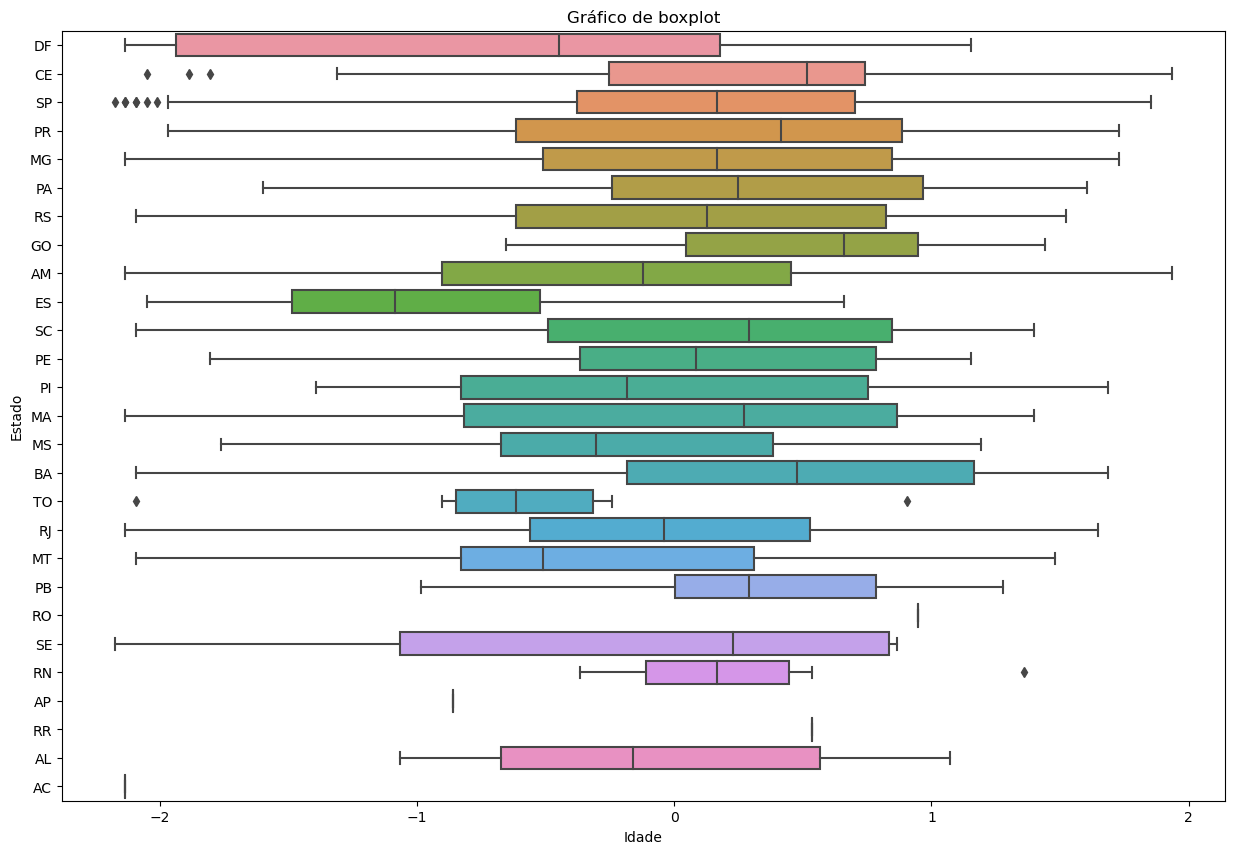

In [52]:
# Criando análise gráfica da Idade por estado
plt.figure(figsize=(15,10))
plt.title("Gráfico de boxplot")
sns.boxplot(x='Idade', y= 'Estado', data= df_amostra, orient= 'h')

<AxesSubplot:title={'center':'Gráfico de boxplot'}, xlabel='Idade', ylabel='Situação'>

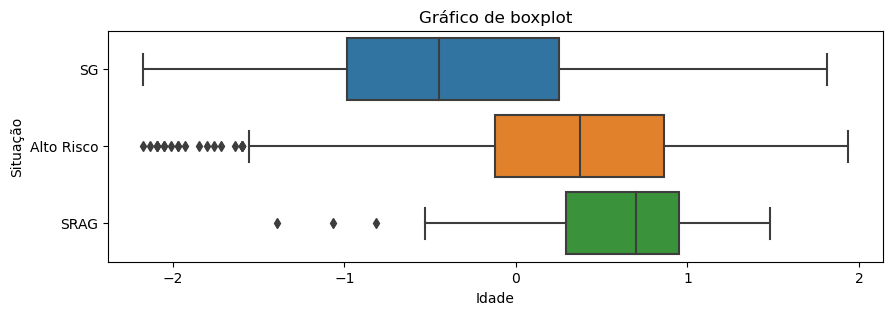

In [53]:
# Análise da Idade por situação
plt.figure(figsize=(10,3))
plt.title("Gráfico de boxplot")
sns.boxplot(x='Idade', y= 'Situação', data= df_amostra, orient= 'h')